---  
pagetitle: "ML-1-proj | VG"
title: Travel Insurance Claim Prediction 
subtitle: Data Analysis Project  
author: Vilmantas Gėgžna  
date: 2023-06-13
date-modified: today
date-format: iso
language:
  title-block-modified: "Updated"
format:
  html:
    toc: true
    toc_float: true
    toc-location: left
    toc-depth: 4
    fig-align: center
    code-tools: true
    code-fold: show # possible options: false, true, show
    number-sections: true
    code-line-numbers: true
    embed-resources: true
    html-math-method: mathjax
    link-external-icon: true
    link-external-newwindow: true
    link-external-filter: ".*ds-project.*"
    page-layout: full
    include-after-body: # To bold "Fig" and "Table" in captions.
      text: |
        <script>
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("figcaption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^((Fig.*?)&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("caption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^(Table.*?&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        </script>
jupyter: python3
filters:
   - add-code-files
crossref:
  chapters: true
  fig-title: 'Fig.'    # (default is "Figure")
  tbl-title: Table     # (default is "Table")
  title-delim: .       # (default is ":")
editor:
  render-on-save: false
---

::: {.content-hidden when-format="html"}

<br><br><br><br><br>

<center>

> **IMPORTANT**
>   
> This Jupyter notebook contains the `source code` of the analysis.  
> The analysis is intended to be studied from its rendered HTML document.   
> Please, **open the HTML** file, which is available at:  
>  
> ►►► <https://gegznav.github.io/ds-projects/travel-insurance> ◄◄◄
> &nbsp;  &nbsp;   
>
> ```
> •▲•  
> ```

</center>
<br><br><br><br><br><br><br>
:::

<style>
#title-block-header.quarto-title-block.default .quarto-title-meta {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
}

div.sourceCode {
  margin: 0;
}

/* R code indicator */
pre.sourceCode .r {
  border-left: 5px solid #7b97ea;
  border-radius: 0
}
.r .fu {font-weight: bold;}

/* Python code indicator */
pre.sourceCode .python {
  border-left: 5px solid #CFB53B;
  border-radius: 0
}
.python .kw {font-style: italic;}

/* Bash code indicator */
pre.sourceCode .bash {
  border-left: 5px solid #bbb;
  border-radius: 0
}

/* Details sections */
details[open].with-border {
  padding: 1px 5px 1px 5px;
  border-style: solid;
  border-color: grey;
  border-width: 3px;
  border-radius: 5px;
}

/* Tables */
caption, .table-caption {
  text-align: left;
  color: #5a6570;
};

table .dataframe .table-striped thead th {
  text-align: left !important;
}


</style>

::: {.content-hidden when-format="html"}

This cell contains `CSS` code.   

:::

<center>

![Travel Insurance project logo. Originally generated with [Leonardo.Ai](https://leonardo.ai/).](./img/Travel_insurance_logo%20(LeonardoAI).jpg){max-width=100%, width=400px}

</center>

***Data analysis tools:*** Python     
***Helper tools:*** VS Code, Quarto, Git  
***Skills:***

- data pre-processing
- inferential statistics
- **predictive modeling**
- exploratory data analysis (**EDA**):
    - descriptive statistics
    - data visualization
- statistical programming
- literate programming

**Technical requirements:**

- Use Scikit-Learn


# Abbreviations {.unnumbered}

- AUC: area under the ROC curve;
- BAcc: balanced accuracy score;
- EDA: exploratory data analysis;
- F1: F1 score;
- FN: false negative;
- FP: false positive;
- Kappa: Cohen's kappa;
- kNN: k-nearest neighbors;
- M (after number): mega (millions);
- ML: machine learning;
- NA: missing values ("not available");
- k (after number): kilo (thousands);
- p0, p25, p75, p100: percentiles (0%, 25%, 75%, 100%);
- RF: random forest;
- ROC: receiver operating characteristic;
- SFS: sequential feature selection;
- SVC: support vector machine for classification;
- TN: true negative;
- TP: true positive;
- VE: virtual environment;
- WD: working directory.

# Summary {.unnumbered}

In this project, a comprehensive analysis of the **travel insurance** dataset was conducted, delving deep into its intricacies. A sophisticated **classification model** was methodically developed, fine-tuned, and **rigorously evaluated** using advanced machine learning techniques. The chosen model, a **Random Forest** algorithm, exhibited an impressive **accuracy of 82.3%** (a balanced accuracy of **76.7%**). This model effectively predicts whether a customer will opt for the insurance or not, based on the customer's *annual income*, *age*, and the *number of family members*. Notably,  **annual income** emerged as the **most influential feature** in making accurate predictions.

# Introduction

## The Issue

A company in the travel industry is introducing a **travel insurance** package that includes coverage for COVID-19. To determine, which customers would be interested in buying it, the company needs to analyze its database history. Data from approximately 2000 previous customers, who were offered the insurance package in 2019, has been provided for this purpose. The **task** is to *build a predictive model* that can determine whether a customer is likely to purchase the travel insurance package.

## Notes on Methodology

In statistical inference, significance level is 0.05, confidence level is 95%.

In machine learning, balanced accuracy (BAcc) is used as the main performance metric.

## Setup and Instructions

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Create and setup virtual environment (VE) for Python</summary>

`conda`, `mamba`, `pip` and other required command line tools must be installed.

Create a virtual environment and install the required packages:
```bash
conda create --name proj-travel-insurance python=3.11
conda activate proj-travel-insurance
pip install -r requirements.txt
```

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Set WD and activate VE</summary>

Every time before working on the project, make sure that the working directory (WD) of the Jupyter Notebook matches the working directory set in the terminal.

To get your current WD in Jupyter Notebook, run the following code in a Python cell:
```python
!echo '%cd%' # under windows
```

In the terminal, to set WD to the project's directory, use `cd` and output of the above code, e.g.:

```bash
# This is just an example, you should choose the correct path in your case
cd 'd:/Data Science/projects/proj-travel-insurance'
```

Next, activate the virtual environment (VE) for this project:
In Jupyter Notebook, use the kernel from this environment.

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


<details class="with-border">
<summary>Download data</summary>

To download the dataset:

1) If you do not have it, create Kaggle API token and save it locally:
   1. Log in to Kaggle.
   2. Go to https://www.kaggle.com/settings
   3. Under API section, click "Create New Token" and it will be suggested to download `kaggle.json` file. 
   4. Save the `kaggle.json` locally in the location `~/.kaggle/kaggle.json`.
2) To download data, run in the terminal:
   ```bash 
   mkdir data
   url=tejashvi14/travel-insurance-prediction-data/versions/4
   kaggle datasets download -d $url -p data/ --unzip
   
   ```
   The data file will be called `TravelInsurancePrediction.csv`.

</details>

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Create/Update HTML report</summary>

- First, run all the code cells in the notebook.   
- Next, create HTML report (command line tool [`quarto`](https://quarto.org/) must be installed):
  
   ```bash
   quarto render travel-insurance.ipynb --to html --output index.html
   ```
- Last, open the HTML file `index.html` in browser. On Windows, you can use the following command in terminal:
  
   ```bash
   start index.html
   ```


</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


In [ ]:
# | code-summary: "Code: **The main Python setup**"
# | code-fold: true

# Automatically reload certain modules
%reload_ext autoreload
%autoreload 1

# Plotting
%matplotlib inline

# Packages and modules -------------------------------
import os
import pickle
from pprint import pprint

# Dataframes
import pandas as pd

# EDA
import ydata_profiling as eda
import sweetviz as sv
from skimpy import skim

# Data wrangling, maths
import numpy as np
import janitor  # imports additional Pandas methods

# Statistical analysis
import scipy.stats as sps
from statsmodels.stats.multitest import multipletests as p_adjust

# Machine learning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector, ColumnSelector

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Visualization
import matplotlib.pyplot as plt

# Custom functions
import functions.fun_utils as my
import functions.pandas_methods
import functions.fun_analysis as an
import functions.fun_ml as ml

%aimport functions.fun_utils
%aimport functions.pandas_methods
%aimport functions.fun_analysis
%aimport functions.fun_ml

# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(7, 3))

# Pandas options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 50)  # Possible option: None
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

# Turn off the scientific notation for floating point numbers.
np.set_printoptions(suppress=True)

# Analysis parameters
do_eda = True

# For caching results ---------------------------------
dir_cache = ".saved_results/"
os.mkdir(dir_cache) if not os.path.exists(dir_cache) else None

In [2]:
# | code-summary: "Code: Custom *ad-hoc* functions"
# | code-fold: true

# NOTE: Some ad-hoc functions are defined in other places of the file
#       when it seemed that it makes the analysis easier to follow.

# Pre-processing pipeline ================================================


class DataFrameAssertion(BaseEstimator, TransformerMixin):
    """Custom transformer for asserting the input data as a Pandas DataFrame.

    This transformer checks if the input data is an instance of a Pandas DataFrame.
    If the input data is not a DataFrame, an AssertionError is raised.

    Attributes:
        None

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to perform the DataFrame assertion.

    """

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(
            X, pd.DataFrame
        ), f"Expected a Pandas DataFrame, got {str(type(X))}"
        return X


class ColnamesToSnakeCase(BaseEstimator, TransformerMixin):
    """Custom transformer for renaming variables to snake case.

    This transformer renames the columns of a DataFrame to snake case.

    Attributes:
        None

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to rename variables to snake case.

    """

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.rename(columns=my.to_snake_case)
        return X


class FeatureSelector(BaseEstimator, TransformerMixin):
    """Selects the indicated features from a DataFrame

    Attributes:
        feature_names (list): List of feature names to select.

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to select columns of interest.
            Returns a DataFrame with the selected features
    """

    def __init__(self, feature_names):
        """Constructor

        Args.:
            feature_names (list): List of feature names to select.
        """
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Select the indicated features from the input DataFrame X
        selected_features = X[self.feature_names]
        return pd.DataFrame(selected_features, columns=self.feature_names)


class ColumnPresenceAssertion(BaseEstimator, TransformerMixin):
    """Custom transformer for column name presence assertion.

    This transformer checks if the input data has the required columns.
    It compares the columns of the input data with a list of required columns.
    If any required columns are missing or there are additional columns not
    specified in the required list, an AssertionError is raised.

    Attributes:
        required_columns (list or array-like):
            The list of required column names.

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to perform column name assertion.

    """

    def __init__(self, required_columns):
        """Constructor for ColumnPresenceAssertion.

        Parameters:
        - required_columns: List of required column names.
        """
        self.required_columns = required_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        required_columns = set(self.required_columns)
        current_columns = set(X.columns)

        missing_columns = required_columns - current_columns
        not_used_columns = current_columns - required_columns

        assert not missing_columns, (
            f"\nMissing columns: {missing_columns}\n"
            f"Present but not used columns: {not_used_columns}"
        )
        return X


class CreateIncomePerFamilyMember(BaseEstimator, TransformerMixin):
    """Custom transformer for creating the 'income_per_family_member' variable.

    This transformer calculates the income per family member by dividing the
    'annual_income' column by the 'family_members' column.

    Attributes:
        None

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to create the 'income_per_family_member' variable.

    """

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["income_per_family_member"] = X["annual_income"] / X["family_members"]
        return X


class CreateAgeGroups(BaseEstimator, TransformerMixin):
    """Custom transformer for creating the 'age_group' variable.

    This transformer creates the 'age_group' variable based on the 'age' column,
    using predefined age group bins. It also creates an additional binary
    variable 'age_group_01' indicating if the age group is '30-35'.

    Attributes:
        only_01 (bool): if True, only groups encoded as 0/1 are returned.

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to create the 'age_group' and 'age_group_01' variables.

    """

    def __init__(self, only_01=False):
        """Constructor for ColumnPresenceAssertion.

        Parameters:
        - only_01: if True, only groups encoded as 0/1 are returned.
        """
        self.only_01 = only_01

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["age_group"] = pd.cut(
            X["age"],
            bins=[24.5, 29.5, 35.5],
            labels=["25-29", "30-35"],
        )
        X["age_group_01"] = (X["age_group"] == "30-35").astype(int)

        if self.only_01:
            X.drop(columns=["age_group"], inplace=True)

        return X


class EncodeEmployment01(BaseEstimator, TransformerMixin):
    """Custom transformer for encoding the 'employment_type' variable.

    This transformer creates a binary variable 'employment_type_01' where
    "1" indicates that employment type is 'Private Sector/Self Employed' and
    "0" indicates that employment type is 'Government Sector'.

    Attributes:
        None

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to create the 'employment_type_01' variable.

    """

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["employment_type_01"] = (
            X["employment_type"] == "Private Sector/Self Employed"
        ).astype(int)

        return X


class CreateTravelExperience(BaseEstimator, TransformerMixin):
    """Custom transformer for creating the 'experienced_traveler' variable.

    This transformer creates a binary variable 'experienced_traveler' based on
    the values of 'ever_travelled_abroad' and 'frequent_flyer' columns.

    Attributes:
        None

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to create the 'experienced_traveler' variable.

    """

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["experienced_traveler"] = (
            (X["ever_travelled_abroad"] == "Yes")
            & (X["frequent_flyer"] == "Yes")
        ).astype(int)

        return X


class SortColumns(BaseEstimator, TransformerMixin):
    """Custom transformer to sort columns alphabetically and move the target
    to the first position.

    This transformer sorts the columns of the input DataFrame in alphabetical
    order and moves the target column (if specified) to the first position.

    Attributes:
        target (str): The name of the target column. Default is None.

    Methods:
        fit(X, y=None):
            Fit method (Returns self).
        transform(X):
            Transform method to sort columns.

    """

    def __init__(self, target=None):
        """Constructor for SortColumns.

        Parameters:
        - target: Name of the target variable to be moved.
        """
        assert isinstance(target, str), "Target variable name must be a string"
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X[sorted(X.columns)]
        if self.target is not None:
            target_column = X.pop(self.target)
            X.insert(0, self.target, target_column)
        return X


class YesNoEncoder(BaseEstimator, TransformerMixin):
    """Custom transformer to encode 'Yes' as 1, 'No' as 0, and handle other values."""

    def fit(self, X, y=None):
        my.assert_values(X, ["Yes", "No"])
        self.columns_ = X.columns
        return self

    def transform(self, X):
        my.assert_values(X, ["Yes", "No"])
        return X[self.columns_].apply(yes_no_to_1_0)

    def get_feature_names_out(self, *args, **params):
        return self.columns_


def yes_no_to_1_0(x: pd.Series):
    """Function to convert 'Yes' to 1, 'No' to 0, and handle other values.

    Parameters:
    - x: Series of values.

    Returns:
    - x: Series with 'Yes' and 'No' values converted to 1 and 0, respectively.
    """
    # Convert to lowercase and trim whitespace
    x = x.str.lower().str.strip()
    # Map values to 1, 0 or NaN
    x = x.map({"yes": 1, "no": 0}).astype(int)
    return x


# Classification ===========================================================


def classification_report_with_confusion_matrix(
    best_models, X, y, labels=[1, 0]
):
    """
    Function to print a classification report with a confusion matrix.

    Reference to interpret confusion matrix:

    - rows: true class
    - columns: predicted class
    - cells contain counts. Usually, the meaning is as follows:
    ```
    TN FP
    FN TP
    ```
    (T - true, F - false, P - positive, N - negative)

    Args:
        best_models (dict): Dictionary containing the best models.
        X (pd.DataFrame): Dataframe containing the features.
        y (pd.Series): Series containing the target.
        labels (list): List containing the labels for confusion matrix.
    """
    [
        [
            y_pred := model.predict(X),
            print(
                "<<< " + name + " >>>",
                "\n",
                classification_report(y, y_pred),
                "\n",
                "Confusion matrix (order of labels is " + str(labels) + "): \n",
                "rows = true labels, columns = predicted labels \n",
                confusion_matrix(y, y_pred, labels=labels),
                "\n",
                "\n\n",
            ),
        ]
        for name, model in best_models.items()
    ]

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>External files with code </summary>

The following functions, methods and classes are present in external files (Python modules). They are displayed here for convenience

In [3]:
# | add-from: functions/fun_utils.py
# | source-lang: python
# | code-filename: 'Contents of file "functions/fun_utils.py"
# |                (various functions imported via the main setup as `my`)'
# | code-fold: true

# comment

In [4]:
# | add-from: functions/pandas_methods.py
# | source-lang: python
# | code-filename: 'Contents of file "pandas_methods.py"
# |                (methods for Pandas objects imported via the main setup)'
# | code-fold: true

# comment

In [5]:
# | add-from: functions/fun_analysis.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_analysis.py"
# |                (functions and classes imported via the main setup as `an`)'
# | code-fold: true

# comment

In [6]:
# | add-from: functions/fun_ml.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_ml.py"
# |                (functions for machine  learning imported via the
# |                main setup as `ml`)'
# | code-fold: true

# comment

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


# Data Exploration and Pre-Processing

## Dataset Description

In this project, travel insurance prediction dataset (version 4) was used. Both dataset and its description are available on [Kaggle](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data/versions/4). The dataset contains the following variables:

- `Age` – age of the customer.
- `Employment Type` – the sector in which the customer is employed.
- `GraduateOrNot` – whether the customer is a college graduate or not.
- `AnnualIncome` – the yearly income of the customer in Indian Rupees (rounded to the nearest 50 thousand Rupees).
- `FamilyMembers` – the number of members in the customer's family.
- `ChronicDisease` – whether the customer suffers from any major disease or condition like diabetes, high blood pressure, or asthma, etc.
- `FrequentFlyer` – derived data based on the customer's history of booking air tickets on at least 4 different instances in the last 2 years (2017-2019).
- `EverTravelledAbroad` – has the customer ever traveled to a foreign country (not necessarily using the company's services).
- `TravelInsurance` – did the customer buy the travel insurance package during the introductory offering held in the year 2019.

(Source: <https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data/versions/4>)

## Import Data

Data file is in CSV format where the first column contains indices:

In [7]:
# wsl is Windows Subsystem for Linux
!wsl head -n 5 data/TravelInsurancePrediction.csv

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0


Read data:

In [8]:
data_all = pd.read_csv("./data/TravelInsurancePrediction.csv", index_col=0)

## Initial Overview of Data

The initial overview of the whole dataset and inference on the target variable revealed that:

- The dataset has 1987 rows and 9 columns (8 explanatory and 1 target variable). 
- No missing data is present.
- The target variable is binary. The classes of target variable are imbalanced (ratio of frequencies is ~1.8) and the difference between the group sizes is significant (chi-square test, p < 0.001): more frequently clients reject the offer to buy travel insurance.
- Column names do not conform to the snake case convention: some are in camel case some have spaces. 
- Some binary variables have values "Yes" and "No", some – 1 and 0. This can be unified.

Find the details in the collapsible section below.

<details class="with-border">
<summary>Initial Overview</summary>

Number of rows and columns:

In [9]:
data_all.shape

(1987, 9)

A few rows of data:

In [10]:
data_all.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


General information about the dataset:

In [11]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


Number of missing values, unique values and data types in each column:

In [12]:
an.get_columns_overview(data_all).style.hide(axis="index")

column,data_type,n_unique,n_missing
Age,int64,11,0
Employment Type,object,2,0
GraduateOrNot,object,2,0
AnnualIncome,int64,30,0
FamilyMembers,int64,8,0
ChronicDiseases,int64,2,0
FrequentFlyer,object,2,0
EverTravelledAbroad,object,2,0
TravelInsurance,int64,2,0


General info on string variables:

In [13]:
data_all.describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


General info on numeric variables:

In [14]:
data_all.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.00,1987.00,1987.00,1987.00,1987.00
mean,29.65,932762.96,4.75,0.28,0.36
std,2.91,376855.68,1.61,0.45,0.48
min,25.00,300000.00,2.00,0.00,0.00
25%,28.00,600000.00,4.00,0.00,0.00
50%,29.00,900000.00,5.00,0.00,0.00
75%,32.00,1250000.00,6.00,1.00,1.00
max,35.00,1800000.00,9.00,1.00,1.00


</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::

<details class="with-border">
<summary>Statistical inference</summary>

To check if target group clients equally frequently buy travel insurance (category code "1") or reject this offer (category code "0"), the following inferential procedures were used:

- chi-square goodness-of-fit test (testing a hypothesis that the group sizes are equal);
- Wilson's 95% confidence intervals of proportions. 

**Note:** The population here is the whole target group of clients represented by the dataset.

In [15]:
# Calculate counts and percentages
freq = data_all.TravelInsurance.value_counts()
freq_df = (
    an.ci_proportion_binomial(freq, method="wilson")
    .reset_index()
    .rename({"index": "Travel insurance"}, axis=1)
)

cols = ["percent", "ci_lower", "ci_upper"]
freq_df[cols] = freq_df[cols].apply(my.counts_to_percentages)

freq_df.style.hide(axis="index")

Travel insurance,n,percent,ci_lower,ci_upper
0,"1,277",64.3%,64.9%,63.7%
1,710,35.7%,35.1%,36.3%


In [16]:
print(
    "Difference between the group sizes is significant \n("
    + an.test_chi_square_gof(freq)
    + ")."
)

Difference between the group sizes is significant 
(chi-square test, χ²(1, n = 1987) = 161.8, p < 0.001).


Around **35.7%** (95% CI: 35.1%-36.3%) of clients **accept** and **64.3%** (95% CI: 64.9%-63.7%) **reject** the offer to buy **travel insurance**.

Ratio of frequencies of the two groups:

In [17]:
round(freq[0] / freq[1], 2)

1.8

</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::


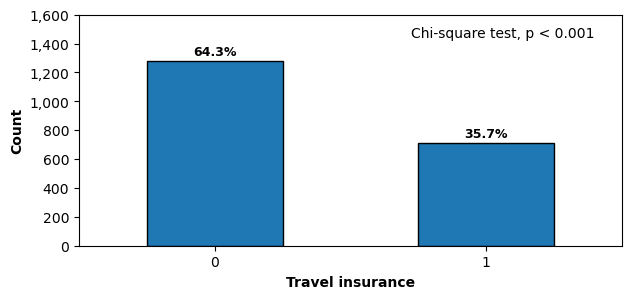

In [18]:
# | label: fig-imbalance
# | fig-cap: '**The frequencies of target variable values**: "0" means "did not
# |          buy the insurance", "1 "means "bought the insurance".
# |          Chi-squared goodness of fit test was performed to test the
# |          hypothesis that the group sizes are equal. The results indicate
# |          that the target variable is **imbalanced**: clients more often
# |          reject the offer to buy the insurance.'
# | code-summary: Code of the figure
# | code-fold: true

# Plot
ax = my.plot_counts_with_labels(freq_df, rot=0, y_lim_max=1600)
chi_sq_rez_1 = an.test_chi_square_gof(freq, output="short")
my.ax_axis_comma_format("y")


# Get the limits of the x-axis and y-axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Set the position of the annotation
x_pos = xlim[1] - 0.05 * (xlim[1] - xlim[0])  # 5% offset from the right edge
y_pos = ylim[1] - 0.05 * (ylim[1] - ylim[0])  # 5% offset from the top edge

# Add the annotation to the top right corner
ax.annotate(
    chi_sq_rez_1.capitalize(),
    xy=(x_pos, y_pos),
    xycoords="data",
    ha="right",
    va="top",
)
plt.show()

## Create Train, Validation and Test Sets

To prevent data leakage and to get more rigorous estimates of model performance, the dataset was split into train, validation and test sets in the ratio **70:15:15**. The split was stratified by the target variable to take class imbalance into account.


- the train set is used to gain more insights about the data, train and tune models, 
- the validation set is used to test the performance of the candidate models,
- the test set is used to evaluate the final model.

In [19]:
# The example to split data into 3 datasets
data_train, data_vt = train_test_split(
    data_all, test_size=0.30, random_state=22, stratify=data_all.TravelInsurance
)

data_validation, data_test = train_test_split(
    data_vt, test_size=0.5, random_state=22, stratify=data_vt.TravelInsurance
)

Actual sample sizes in these sets are:

In [20]:
# | code-fold: true
print(
    f"n = {data_train.shape[0]} (train), "
    f"{data_validation.shape[0]} (validation), "
    f"{data_test.shape[0]} (test)."
)

n = 1390 (train), 298 (validation), 299 (test).


## EDA on Train Set Before Further Pre-Processing

In addition to the initial overview, a deeper look into the train set was made.
It suggested some pre-processing ideas, which are described in the next section.

In [21]:
an.get_columns_overview(data_train).style.hide(axis="index")

column,data_type,n_unique,n_missing
Age,int64,11,0
Employment Type,object,2,0
GraduateOrNot,object,2,0
AnnualIncome,int64,30,0
FamilyMembers,int64,8,0
ChronicDiseases,int64,2,0
FrequentFlyer,object,2,0
EverTravelledAbroad,object,2,0
TravelInsurance,int64,2,0


In [22]:
skim(data_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1390   │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Age                │   0 │     0 │       30 │      2.9 │      25 │      28 │        32 │       35 │ ▄█▂▄▃▄ │  │
│ │ AnnualIncome       │   0 │     0 │   930000 │   380000 │  300000 │  600000 │   1200000 │  1800000 │ ▇▇▇█▇▁ │  │
│ │ FamilyMembers      │   0 │     0 │      4.7 │      1.6 │       2 │       4 │         6 │        9 │ ██▇▅▃▂ │  │
│ │ ChronicDiseases    │   0 │     0 │     0.28 │     0.45 │       0 │       0 │         1 │        1 │ █    ▃ │  │
│ │ TravelInsurance    │   0 │     0 │     0.36 │     0.48 │       0 │       0 │         1 │        1 │ █    ▄ │  │
│ └────────────────────┴─────┴───────┴──────────┴──────────┴─────────┴─────────┴───────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Employment Type                      │     0 │         0 │                      2.7 │                 3800 │  │
│ │ GraduateOrNot                        │     0 │         0 │                      2.7 │                 3800 │  │
│ │ FrequentFlyer                        │     0 │         0 │                      2.7 │                 3800 │  │
│ │ EverTravelledAbroad                  │     0 │         0 │                      2.7 │                 3800 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

List values and their counts for variables with less than 10 unique values:

In [23]:
[
    print(data_train[i].value_counts().sort_index(), "\n")
    for i in data_train
    if data_train[i].nunique() < 10
];

Government Sector                389
Private Sector/Self Employed    1001
Name: Employment Type, dtype: int64 

No      207
Yes    1183
Name: GraduateOrNot, dtype: int64 

2     61
3    275
4    354
5    293
6    201
7    128
8     41
9     37
Name: FamilyMembers, dtype: int64 

0    1001
1     389
Name: ChronicDiseases, dtype: int64 

No     1090
Yes     300
Name: FrequentFlyer, dtype: int64 

No     1125
Yes     265
Name: EverTravelledAbroad, dtype: int64 

0    893
1    497
Name: TravelInsurance, dtype: int64 



## Pre-Processing (Group-Independent)

Scikit-learn's pipelines are used to pre-process the data. The following steps are performed:

- assert that input is a data frame (as the following steps assume it),
- rename columns to snake case,
- check that the required column names are present,
- create additional variables:
    - income per family member;
    - age_groups (groups for 25-29 and 29-35 years old),
    - experienced traveler ("yes" if a client is a frequent flyer and has been abroad),
- encode yes/no variables as 1/0,
- encode binary employment type variable as 1/0 (private sector and self-employed, "1" vs. government sector, "0"),
- sort columns alphabetically and move the target variable to the beginning (required for exploratory analysis).


In [24]:
# Required columns
cols = [
    "travel_insurance",
    "age",
    "employment_type",
    "graduate_or_not",
    "annual_income",
    "family_members",
    "chronic_diseases",
    "frequent_flyer",
    "ever_travelled_abroad",
]

# Yes/No variables to encode as 1/0
yes_no_vars = ["graduate_or_not", "frequent_flyer", "ever_travelled_abroad"]

yes_no_transformer = ColumnTransformer(
    transformers=[("label_encoder", YesNoEncoder(), yes_no_vars)],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

yes_no_transformer.set_output(transform="pandas")

# Creating the pipeline
pre_processing = Pipeline(
    [
        ("assert_data_frame", DataFrameAssertion()),
        ("rename_columns_to_snake_case", ColnamesToSnakeCase()),
        ("assert_column_names", ColumnPresenceAssertion(required_columns=cols)),
        ("create_col_income_per_family_member", CreateIncomePerFamilyMember()),
        ("create_col_age_groups", CreateAgeGroups()),
        ("create_col_experienced_traveler", CreateTravelExperience()),
        ("encode_yes_no_as_1_0", yes_no_transformer),
        ("encode_employment_as_1_0", EncodeEmployment01()),
        ("sort_columns", SortColumns(target="travel_insurance")),
        ("return_as_is", FunctionTransformer(lambda x: x)),
    ]
)

data_train_preprocessed = pre_processing.fit_transform(data_train)

## EDA for Pre-Processed Train Set

An extensive EDA was performed using the `skimpy`, `SweetViz` and `ydata-profiling` packages.
The results are summarized in the following paragraphs, and the details are presented in the collapsible sections and tables below.

**Summary.**
Based on the sample of 1390 clients (the training set):

- The age of the clients (target group) ranges from 25 to 35 years old;
- The number of family members ranges from 2 to 9;
- Annual income ranges from 300k to 1800k;
- Annual income per family member ranges from 33k to 850k;
- The majority of clients:
    - are college graduates;
    - work in the private sector or are self-employed;
    - have no chronic diseases;
    - have never been abroad;
    - are not frequent flyers.

Analysis of correlations/associations revealed that the status of buying **travel insurance** is **associated with** the status if a client ever traveled abroad or if he/she is a frequent and experienced traveler, his/her annual income, annual income per family member, employment type and even the number of family members are associated **while** graduation status and presence of chronic diseases are not (see @tbl-correlation).
On the other hand, **annual income** is **associated with** such variables as employment type, the status of being a frequent/experienced traveler or income per family member (see section "Associations" under "SweetViz" report) so these variables *might not contribute much* to the prediction of travel insurance purchase in addition to annual income. 

**Details:**

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border">
<summary> EDA: Overview (skimpy) </summary>

In [25]:
skim(data_train_preprocessed)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 1390   │ │ int32       │ 11    │ │ age_group             │                                │
│ │ Number of columns │ 14     │ │ category    │ 1     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ travel_insurance        │   0 │     0 │    0.36 │    0.48 │       0 │       0 │       1 │       1 │ █    ▄ │  │
│ │ age                     │   0 │     0 │      30 │     2.9 │      25 │      28 │      32 │      35 │ ▄█▂▄▃▄ │  │
│ │ age_group_01            │   0 │     0 │    0.44 │     0.5 │       0 │       0 │       1 │       1 │ █    ▆ │  │
│ │ annual_income           │   0 │     0 │  930000 │  380000 │  300000 │  600000 │ 1200000 │ 1800000 │ ▇▇▇█▇▁ │  │
│ │ chronic_diseases        │   0 │     0 │    0.28 │    0.45 │       0 │       0 │       1 │       1 │ █    ▃ │  │
│ │ employment_type_01      │   0 │     0 │    0.72 │    0.45 │       0 │       0 │       1 │       1 │ ▃    █ │  │
│ │ ever_travelled_abroa    │   0 │     0 │    0.19 │    0.39 │       0 │       0 │       0 │       1 │ █    ▂ │  │
│ │ experienced_traveler    │   0 │     0 │   0.087 │    0.28 │       0 │       0 │       0 │       1 │ █    ▁ │  │
│ │ family_members          │   0 │     0 │     4.7 │     1.6 │       2 │       4 │       6 │       9 │ ██▇▅▃▂ │  │
│ │ frequent_flyer          │   0 │     0 │    0.22 │    0.41 │       0 │       0 │       0 │       1 │ █    ▂ │  │
│ │ graduate_or_not         │   0 │     0 │    0.85 │    0.36 │       0 │       1 │       1 │       1 │ ▁    █ │  │
│ │ income_per_family_me    │   0 │     0 │  220000 │  130000 │   33000 │  130000 │  280000 │  850000 │  ██▃▁  │  │
│ └─────────────────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ age_group                        │         0 │              0 │ True                  │                  2 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━

In [26]:
age_group_counts = data_train_preprocessed.age_group.value_counts()
age_group_counts.to_df().style.hide(axis="index")

age_group,count
25-29,784
30-35,606


**Note:** Some variables (like `age_group` and `age_grup_01`) now have identical information just coded in a different way (one variable is better suited for EDA, the other one for modeling). The redundant variables will be removed later.

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border">
<summary>EDA: Data Profiling Report of Training Data (SweetViz) </summary>


                                             |          | [  0%]   00:00 -> (? left)


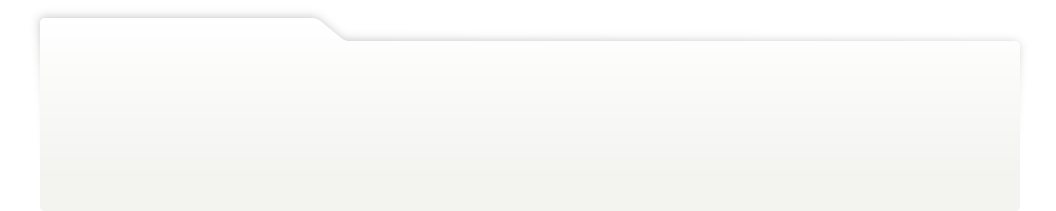
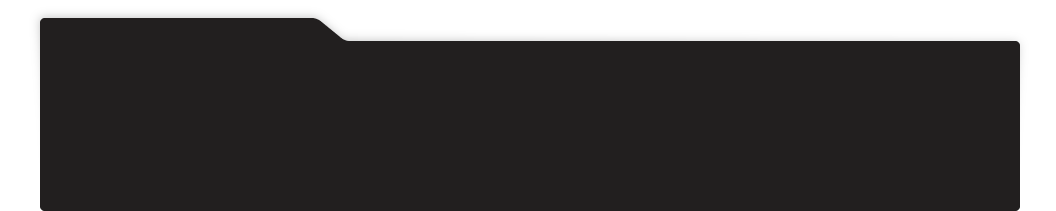
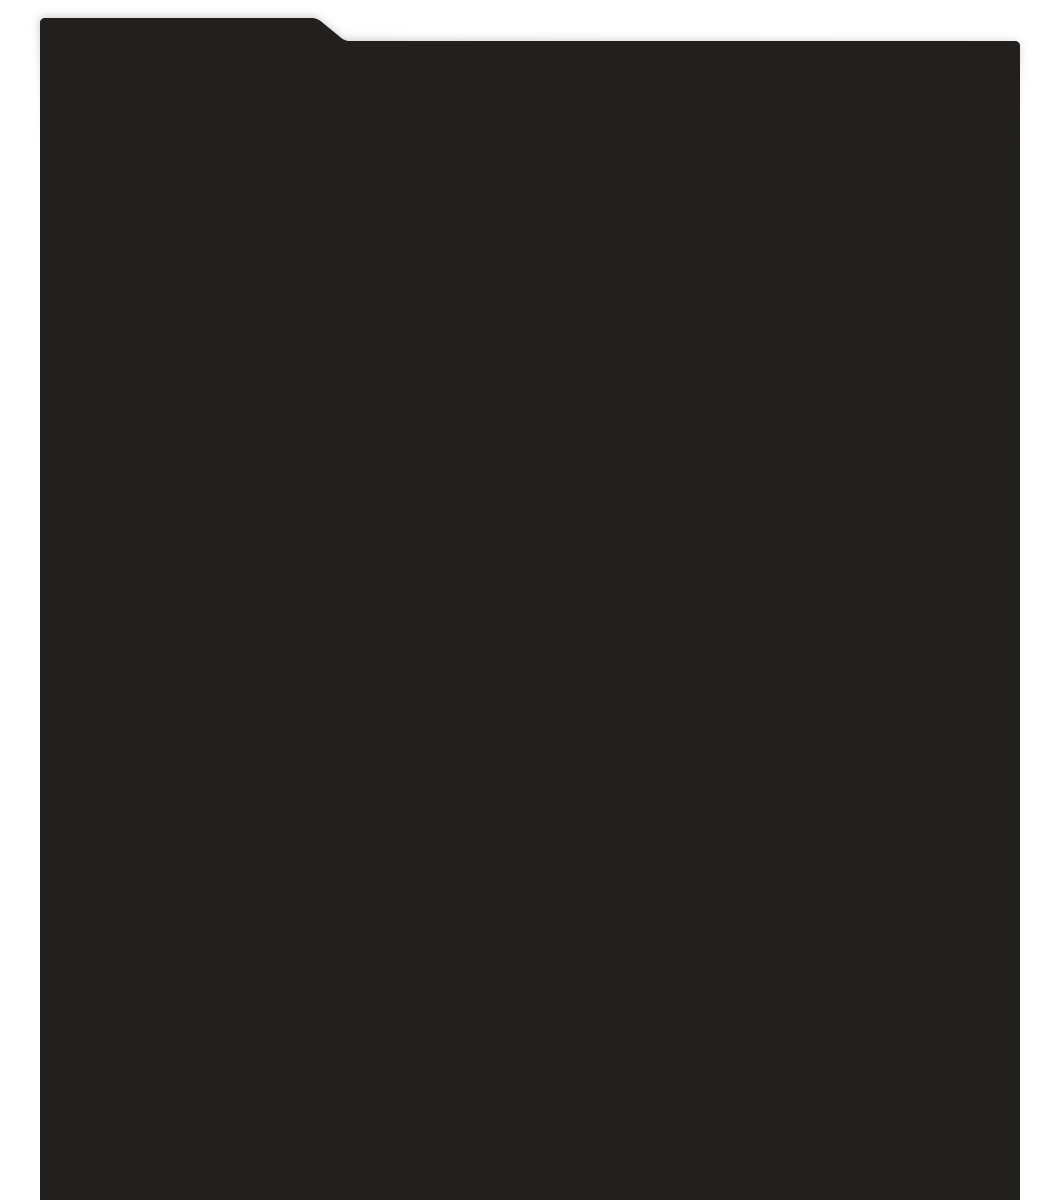
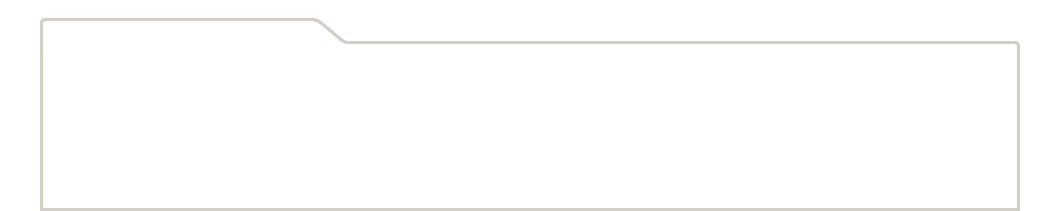
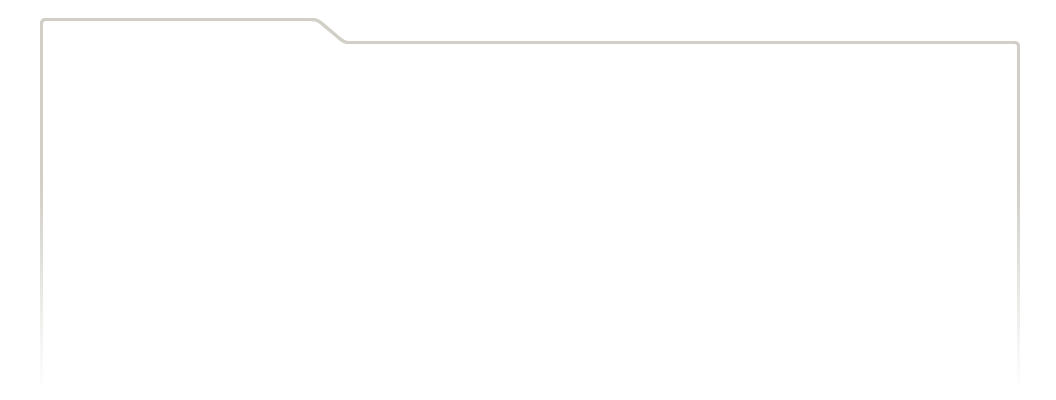
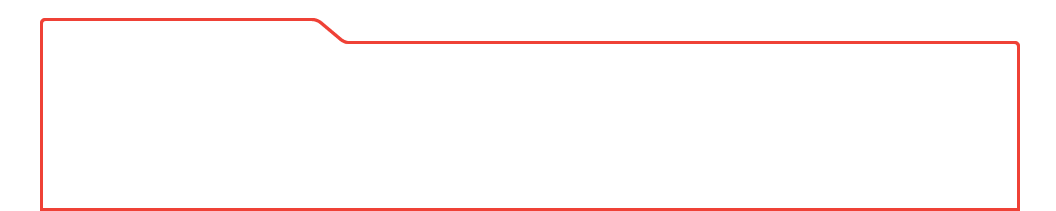
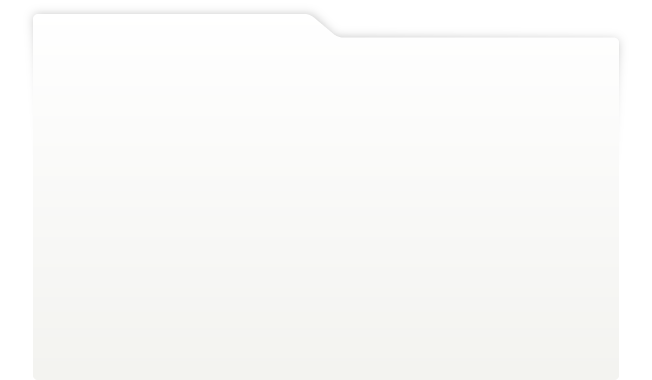
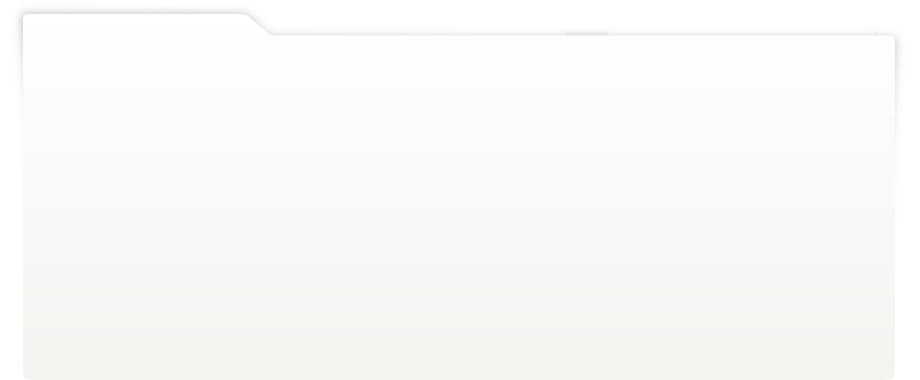
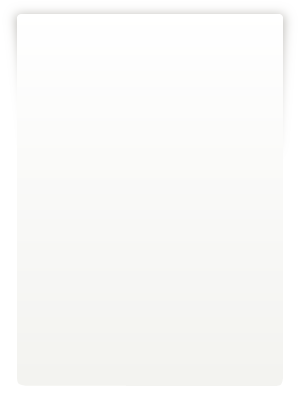
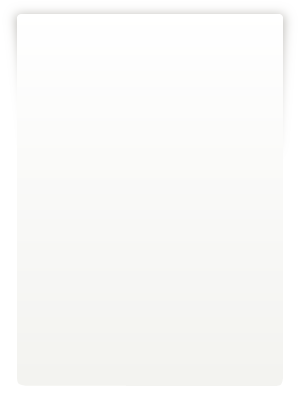
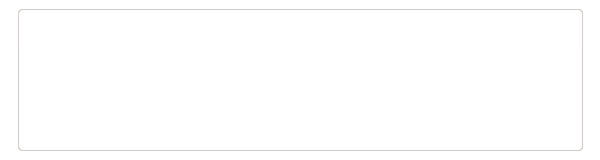
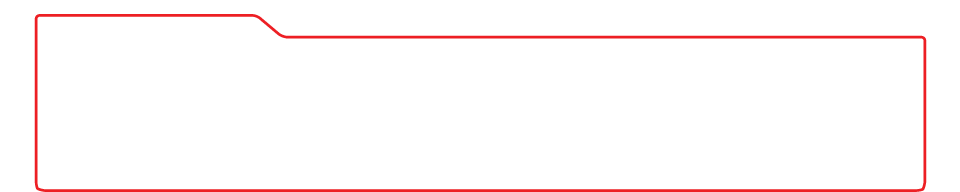
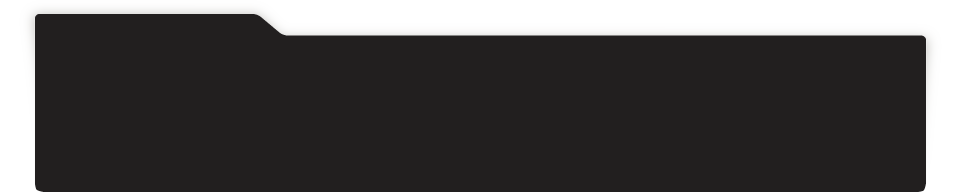
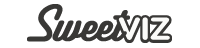
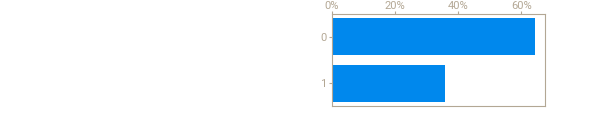
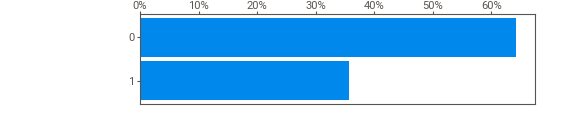
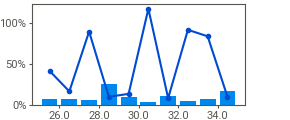
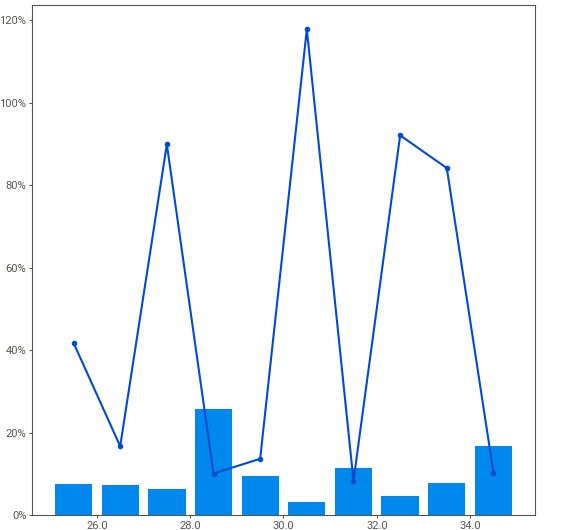
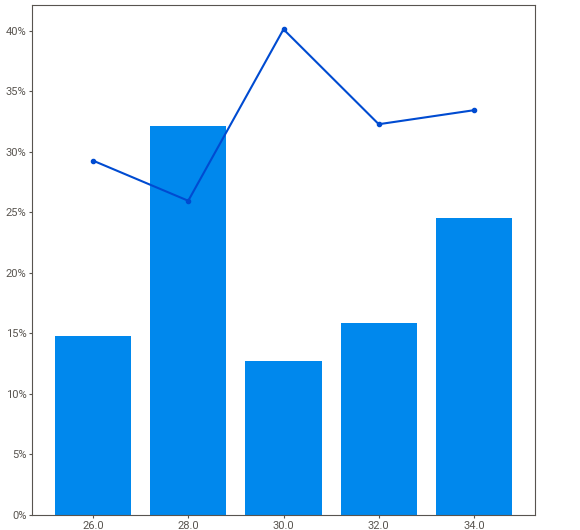
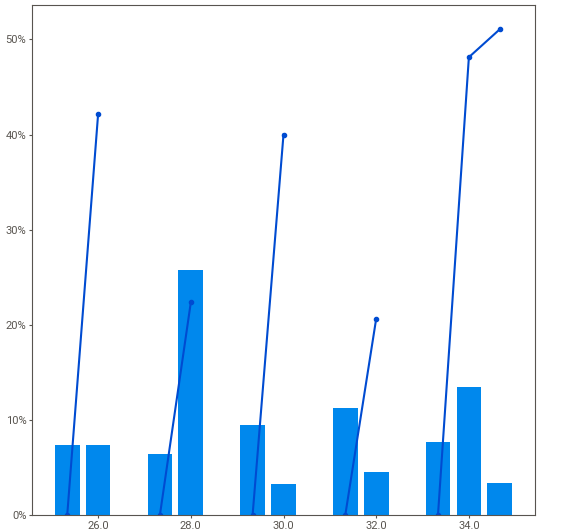
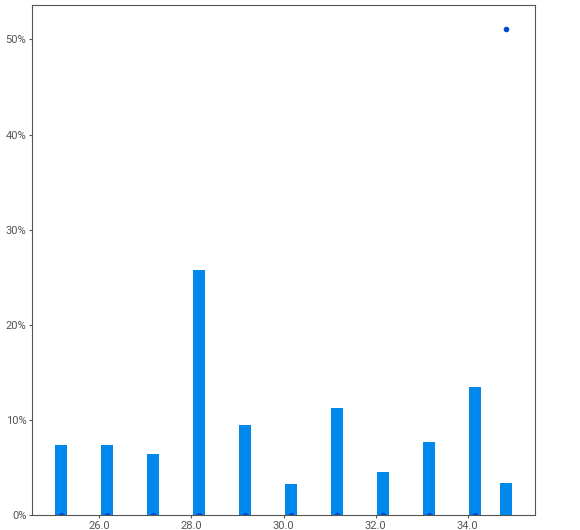
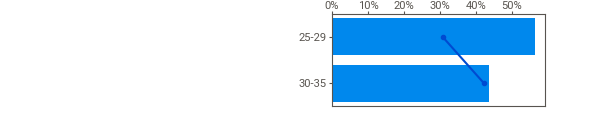
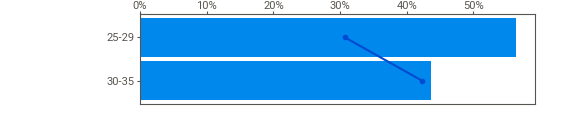
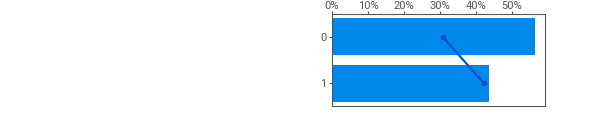
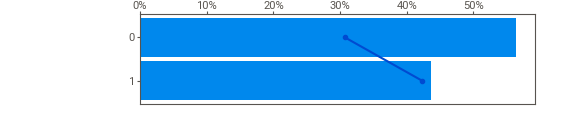
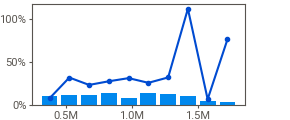
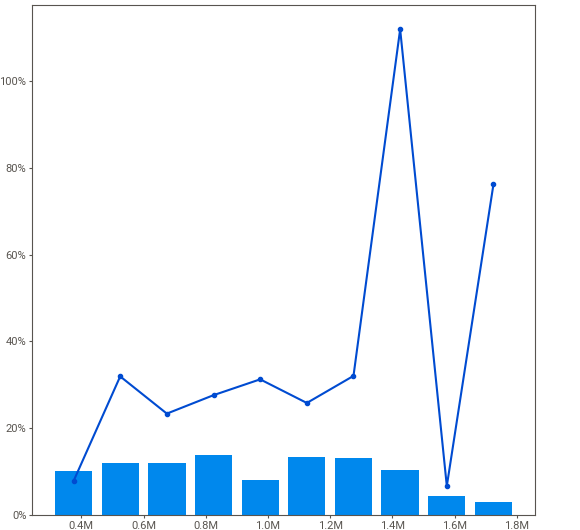
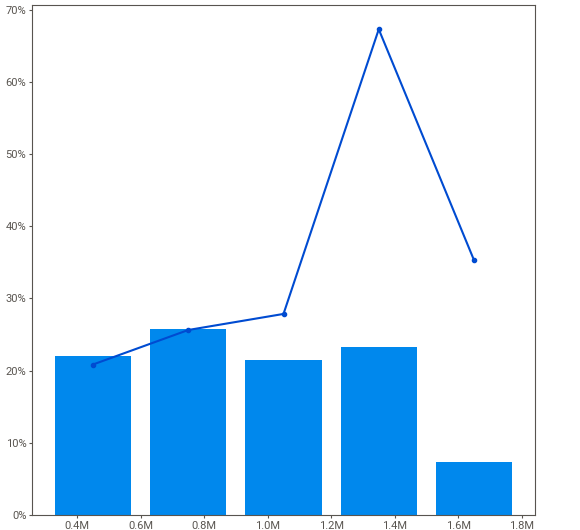
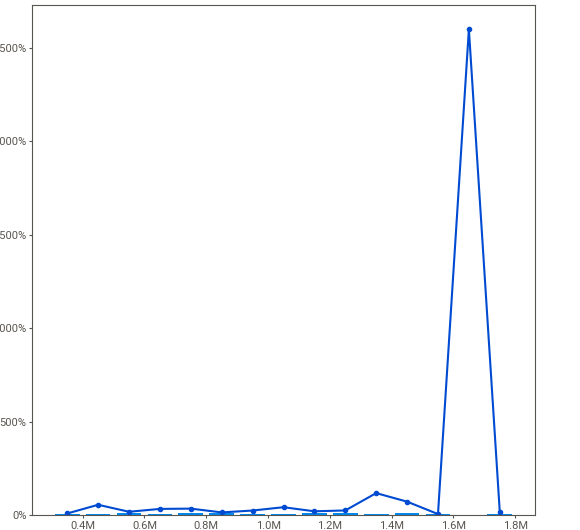
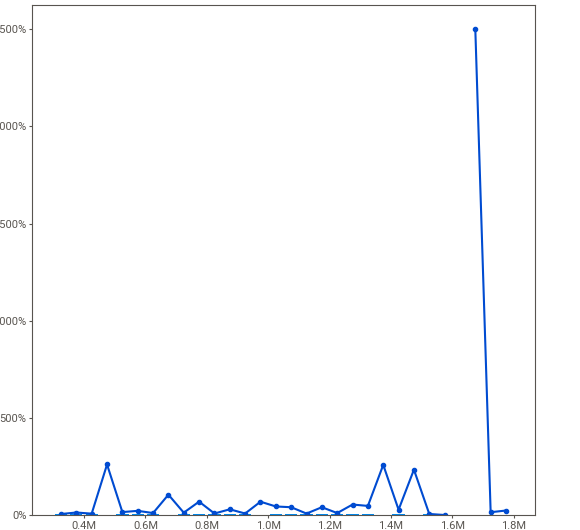
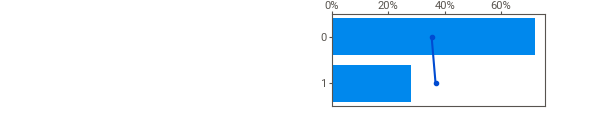
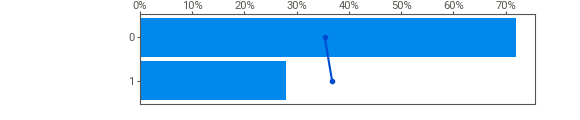
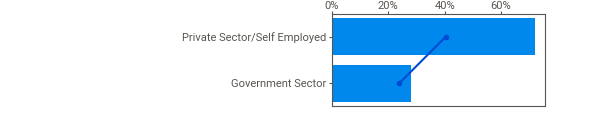
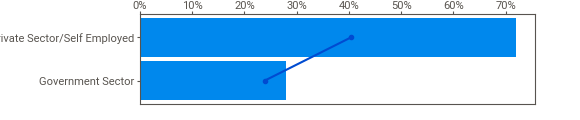
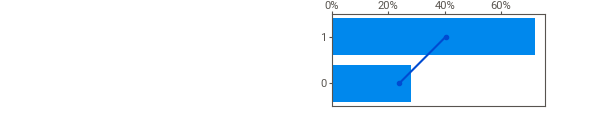
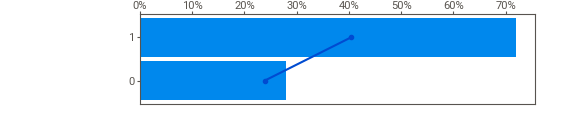
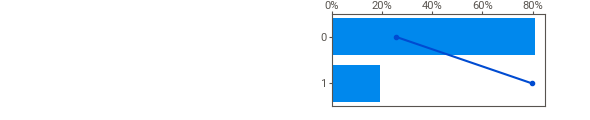
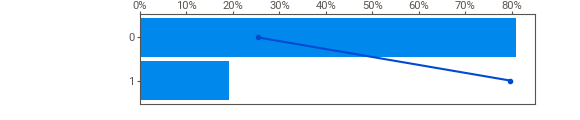
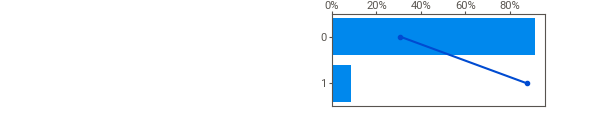
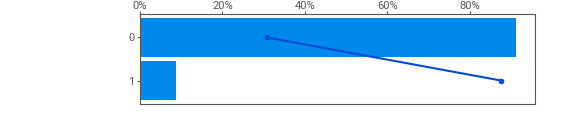
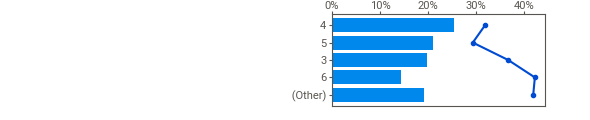
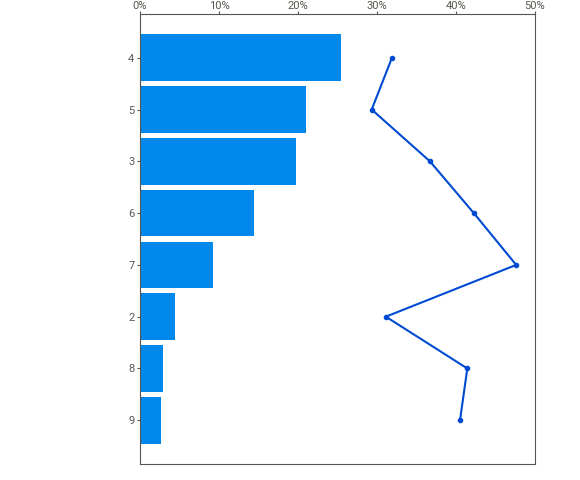
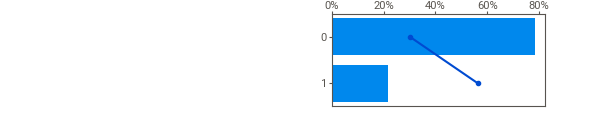
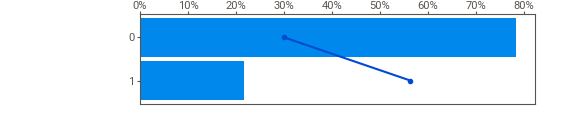
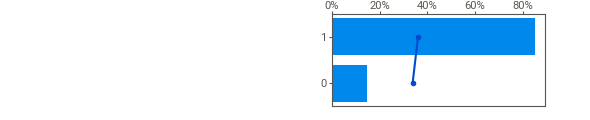
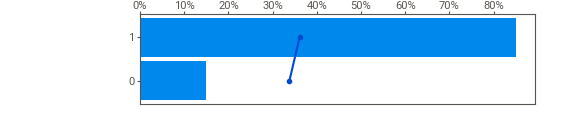
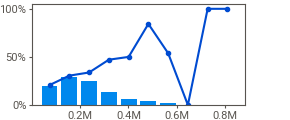
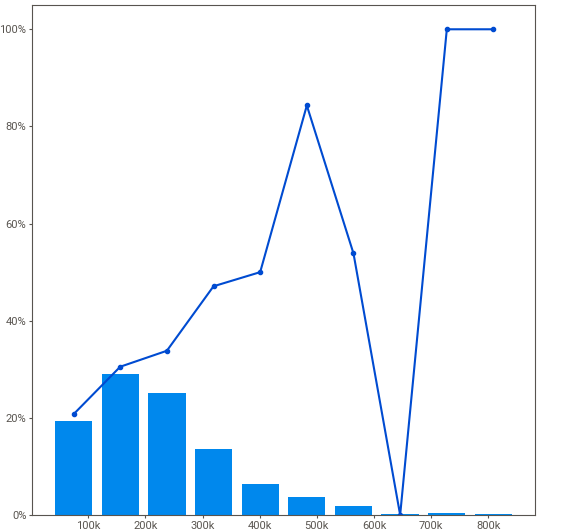
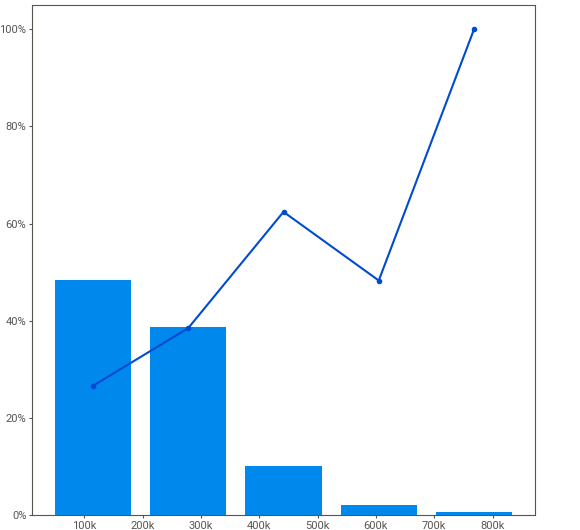
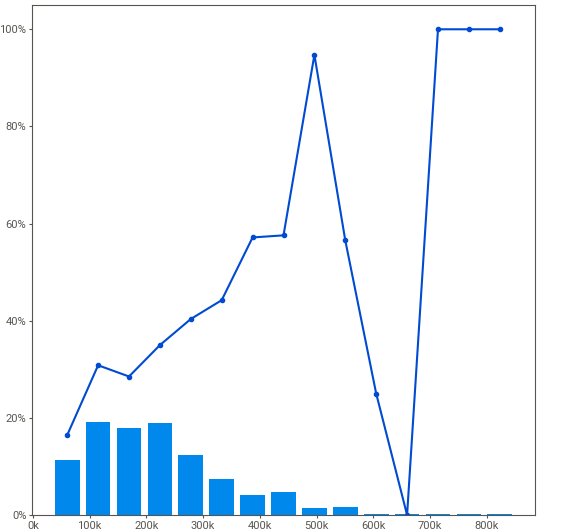
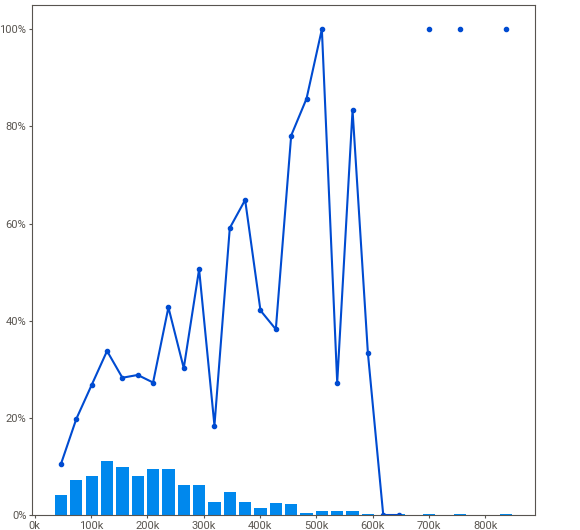
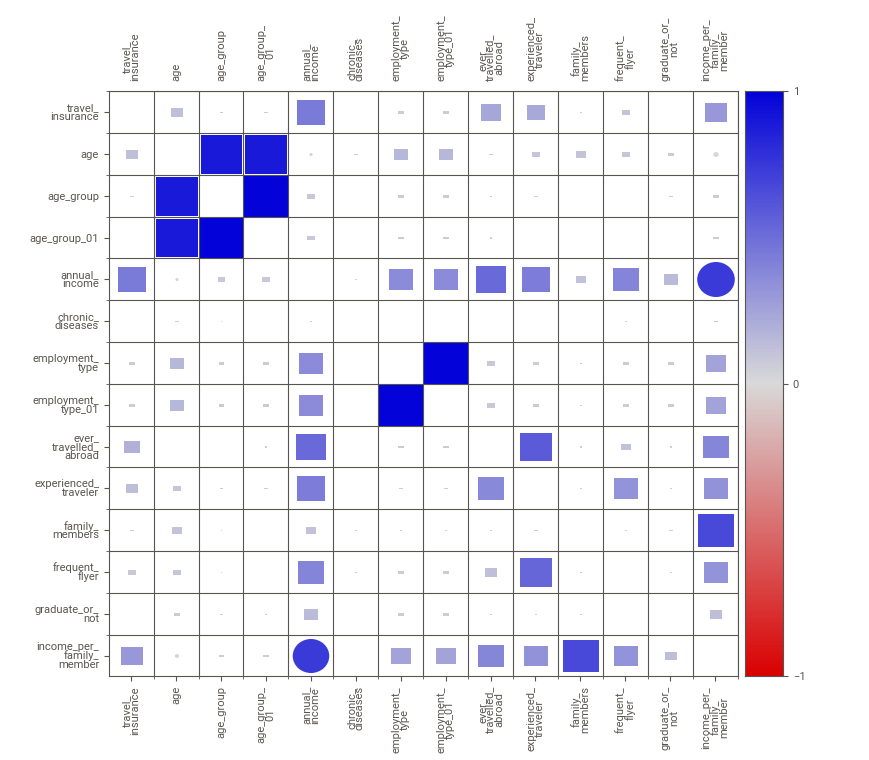
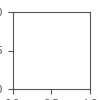

In [27]:
if do_eda:
    report = sv.analyze(
        [data_train_preprocessed, "Train"], target_feat="travel_insurance"
    )
    report.show_notebook()

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>EDA: Data Profiling Report of Training Data (ydata-profiling) </summary>



In [28]:
if do_eda:
    display(
        eda.ProfileReport(
            data_train_preprocessed,
            title="Data Profiling Report: Training Data",
            config_file="_config/ydata_profile_config--mini.yaml",
        )
    )

</details>


::: {.content-hidden when-format="html"}

`</details>`   
End of the collapsible section  

---  

:::

**Correlation Analysis**
To explore the relationship between the target variable and the other numeric variables, a point-biserial correlation analysis was conducted. The correlation coefficient (denoted as `r` in the table below) was calculated, along with the corresponding p-values. Additionally, p-values adjusted for multiple comparisons using the Holm-Šídák method were computed. The correlation analysis results are summarized in @tbl-correlation.

In [29]:
# | code-fold: true
# | label: tbl-correlation
# | tbl-cap: 'Point-biserial **correlation** between the target variable and
# |          the numeric/binary features**.'

target = "travel_insurance"
non_target_numeric = (
    data_train_preprocessed.select_dtypes("number").drop(columns=target).columns
)

cor_data = [
    (
        i,
        *sps.pointbiserialr(
            data_train_preprocessed[target], data_train_preprocessed[i]
        ),
    )
    for i in non_target_numeric
]
cor_data = pd.DataFrame(cor_data, columns=["variable_2", "r", "p"])
cor_data.insert(0, "variable_1", target)

(
    cor_data.sort_values("r", ascending=False)
    .assign(
        p_adj=lambda x: [my.format_p(i, add_p=False) for i in p_adjust(x.p)[1]]
    )
    .assign(r=lambda x: x.r.round(2))
    .assign(p=lambda x: x.p.apply(my.format_p, add_p=False))
    .index_start_at(1)
    .style.format({"r": "{:.2f}"})
    .bar(vmin=-1, vmax=1, cmap="BrBG", subset=["r"])
)

,variable_1,variable_2,r,p,p_adj
1,travel_insurance,ever_travelled_abroad,0.44,<0.001,<0.001
2,travel_insurance,annual_income,0.41,<0.001,<0.001
3,travel_insurance,experienced_traveler,0.33,<0.001,<0.001
4,travel_insurance,income_per_family_member,0.27,<0.001,<0.001
5,travel_insurance,frequent_flyer,0.23,<0.001,<0.001
6,travel_insurance,employment_type_01,0.15,<0.001,<0.001
7,travel_insurance,age_group_01,0.12,<0.001,<0.001
8,travel_insurance,age,0.08,0.004,0.016
9,travel_insurance,family_members,0.07,0.010,0.028
10,travel_insurance,graduate_or_not,0.02,0.528,0.778


## Prepare Train and Validation Sets for Modeling

Initially, redundant variables such as **"age_group" and "employment_type"** will be **eliminated** from the dataset. Although it would be justifiable to remove uncorrelated variables like "graduate_or_not" and "chronic_disease" due to the small number of features, they will be retained for the time being.

Subsequently, the training and validation sets will be prepared for the modeling process. This involves applying appropriate transformations and separating the target variable from the remaining features.

In [30]:
data_train_2 = data_train_preprocessed.drop(
    columns=["age_group", "employment_type"]
)
[print(i, col) for i, col in enumerate(data_train_2.columns, start=1)];

1 travel_insurance
2 age
3 age_group_01
4 annual_income
5 chronic_diseases
6 employment_type_01
7 ever_travelled_abroad
8 experienced_traveler
9 family_members
10 frequent_flyer
11 graduate_or_not
12 income_per_family_member


In [31]:
X_train = data_train_2.drop("travel_insurance", axis=1)
y_train = data_train_2["travel_insurance"].to_numpy()

data_validation_2 = pre_processing.transform(data_validation)
X_validation = data_validation_2.drop("travel_insurance", axis=1)
y_validation = data_validation_2["travel_insurance"].to_numpy()

# Modeling

There were several main stages of the modeling procedure:

1) Model pre-selection (narrowing down the list of candidate models);
2) Feature selection (selecting the most important features);
3) Parameter tuning (tuning the hyperparameters of the selected models);
4) Evaluation of the final model on the test set.

Balanced accuracy (**BAcc**) was used as the main metric for model evaluation. 

## Model Pre-Selection

In this section, a short list of parameters for 5 types of ML algorithms (logistic regression, k-nearest neighbors, support vector machine for classification (SVC), random forest and Naive Bayes) will be tuned and these 5 models will be compared to select the best candidates for the next step.

First, group-dependent pre-processing pipeline steps will be introduced (this section).  
Then, a grid of models and e few hyperparameters will be defined (this section).  

Finally, (in the two following subsections) modeling without and with under-sampling will be performed.




**Summary.** In modeling without under-sampling, the best model is RandomForest, in modeling with under-sampling, the best model is SVC. The kNN model's performance was similar, so these three candidates were used in the following steps of model selection. The main results are presented in @tbl-preselect-validation and @tbl-preselect-imb-validation.

**Details:**

In [32]:
# Add group-dependent pre-processing steps which will be performed
# before each model re-fitting

numeric_features = [
    "age",
    "annual_income",
    "family_members",
    "income_per_family_member",
]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

group_dependent_preprocessor = ColumnTransformer(
    transformers=[("numeric", numeric_transformer, numeric_features)],
    remainder="passthrough",
)


# Create the pipeline with the preprocessor and the classifier
pipeline = Pipeline(
    steps=[
        ("preprocessor", group_dependent_preprocessor),
        ("classifier", BaseEstimator()),  # Replace with desired classifier
    ]
)

In [33]:
# Define the list of classifiers along with their respective hyperparameter grids
classifiers = [
    (
        "Logistic Regression",
        LogisticRegression(random_state=1, max_iter=1000),
        {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    ),
    (
        "kNN",
        KNeighborsClassifier(),
        {"classifier__n_neighbors": [3, 5, 7, 10, 12, 15, 17, 20]},
    ),
    (
        "SVC",
        SVC(random_state=1, probability=True),
        [
            {
                "classifier__kernel": ["linear"],
                "classifier__C": [0.01, 0.1, 1, 10, 100],
            },
            {
                "classifier__kernel": ["rbf"],
                "classifier__C": [0.01, 0.1, 1, 10, 100],
                "classifier__gamma": [0.01, 0.1, 1, 10, 100],
            },
        ],
    ),
    (
        "Random Forest",
        RandomForestClassifier(random_state=1),
        {"classifier__n_estimators": [50, 100, 200, 300]},
    ),
    ("Naive Bayes", GaussianNB(), {}),
]

### Model Pre-Seleciton (Original Group Size Proportions)

In this sub-section, the issue of class imbalance is not addressed. The original group size proportions are used.

In [34]:
@my.cache_results(dir_cache + "01_1_best_models_orig.pickle")
def do_best_models_orig():
    """The following code is wrapped into a function for result catching.

    Select the best model for each classifier.
    """

    # Create a list to store the best models
    best_models_orig = {}

    # Iterate over the classifiers and perform hyperparameter tuning using
    # cross-validation
    for name, classifier, param_grid in classifiers:
        # Create the pipeline with the preprocessor, and the classifier
        pipeline = Pipeline(
            steps=[
                ("preprocessor", group_dependent_preprocessor),
                ("classifier", classifier),
            ]
        )

        # Perform hyperparameter tuning using cross-validation
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_models_orig[name] = grid_search.best_estimator_
    return best_models_orig


best_models_orig = do_best_models_orig()

<details class="with-border"><summary>Output details</summary>

Time: 2m 52.2s

```
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
```

</details>

The performance of the classification. 
The best scores of each column are in **orange** (training set)/**green** (validation set):

In [35]:
# | code-fold: true
# | label: tbl-preselect-training
# | tbl-cap: 'Classification scores for the **train set**
# |           (original group sizes). The best values in each column are
# |            highlighted.'

ml.print_classification_scores(
    best_models_orig,
    X_train,
    y_train,
    "--- Train (original group sizes) ---",
    color="orange",
)

--- Train (original group sizes) ---
No information rate:  0.642


,Accuracy,BAcc,Kappa,F1,ROC AUC
Logistic Regression,0.780,0.716,0.474,0.616,0.716
kNN,0.820,0.766,0.576,0.697,0.766
SVC,0.827,0.773,0.591,0.707,0.773
Random Forest,0.931,0.912,0.846,0.897,0.912
Naive Bayes,0.768,0.707,0.450,0.603,0.707


In [36]:
# | code-fold: true
# | label: tbl-preselect-validation
# | tbl-cap: 'Classification scores for the **validation set**
# |            (original group sizes). The best values in each column are
# |            highlighted.'
ml.print_classification_scores(
    best_models_orig, X_validation, y_validation, "--- Validation ---"
)

--- Validation ---
No information rate:  0.644


,Accuracy,BAcc,Kappa,F1,ROC AUC
Logistic Regression,0.779,0.710,0.465,0.602,0.710
kNN,0.802,0.745,0.531,0.663,0.745
SVC,0.802,0.741,0.527,0.655,0.741
Random Forest,0.802,0.762,0.548,0.691,0.762
Naive Bayes,0.735,0.665,0.364,0.533,0.665


<details class="with-border">
<summary>Detailed classification report (validation)</summary>

In [37]:
print("Detailed classification report (validation)")
classification_report_with_confusion_matrix(
    best_models_orig, X_validation, y_validation
)

Detailed classification report (validation)
<<< Logistic Regression >>> 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       192
           1       0.83      0.47      0.60       106

    accuracy                           0.78       298
   macro avg       0.80      0.71      0.72       298
weighted avg       0.79      0.78      0.76       298
 
 Confusion matrix (order of labels is [1, 0]): 
 rows = true labels, columns = predicted labels 
 [[ 50  56]
 [ 10 182]] 
 


<<< kNN >>> 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       192
           1       0.84      0.55      0.66       106

    accuracy                           0.80       298
   macro avg       0.82      0.74      0.76       298
weighted avg       0.81      0.80      0.79       298
 
 Confusion matrix (order of labels is [1, 0]): 
 rows = true labels, columns = predicted labels 
 [[ 58  48]
 [ 11 181]] 
 


<<< 

</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::

### Model Pre-Selecition (with Undersampling)

The classification performance was also evaluated using the **random undersampling** strategy that is used to balance the dataset. 

**Results:** Using the undersampling strategy, SVC performance improved, in the case of logistic regression, some performance coefficients improved (e.g., F1 score), some decreased(e.g., Kappa), and some did not change. In all other cases, this strategy **did not improve** the performance of classifiers. 

Find the details below.

In [38]:
@my.cache_results(dir_cache + "01_2_best_models_undersampling.pickle")
def do_best_models_undersampling():
    """The following code is wrapped into a function for result catching.

    Select the best model for each classifier. Undersampling is applied.
    """

    # Create a list to store the best models
    best_models_undersampling = {}

    # Iterate over the classifiers and perform hyperparameter tuning
    # using cross-validation
    for name, classifier, param_grid in classifiers:
        # Create the imblearn pipeline with the preprocessor, undersampler,
        # and the classifier
        imblearn_pipeline = ImbPipeline(
            steps=[
                ("preprocessor", group_dependent_preprocessor),
                ("undersampler", RandomUnderSampler(random_state=1)),
                ("classifier", classifier),
            ]
        )

        # Perform hyperparameter tuning using cross-validation
        grid_search = GridSearchCV(
            imblearn_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_models_undersampling[name] = grid_search.best_estimator_
    return best_models_undersampling


best_models_undersampling = do_best_models_undersampling()


<details class="with-border"><summary>Output details</summary>


Time: 21.8s

```
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
```


</details>

The performance of the classification. 
The best scores of each column are in **orange** (training set)/**green** (validation set):

In [39]:
# | code-fold: true
# | label: tbl-preselect-imb-training
# | tbl-cap: 'Classification scores for the **train set**
# |           (with under-sampling). The best values in each column are
# |            highlighted.'
ml.print_classification_scores(
    best_models_undersampling,
    X_train,
    y_train,
    "--- Train (with under-sampling) ---",
    color="orange",
)

--- Train (with under-sampling) ---
No information rate:  0.642


,Accuracy,BAcc,Kappa,F1,ROC AUC
Logistic Regression,0.754,0.725,0.457,0.644,0.725
kNN,0.795,0.760,0.538,0.689,0.760
SVC,0.819,0.778,0.586,0.715,0.778
Random Forest,0.894,0.896,0.775,0.859,0.896
Naive Bayes,0.760,0.702,0.436,0.598,0.702


In [40]:
# | code-fold: true
# | label: tbl-preselect-imb-validation
# | tbl-cap: 'Classification scores for the **validation set**
# |           (with under-sampling). The best values in each column are
# |            highlighted.'
ml.print_classification_scores(
    best_models_undersampling,
    X_validation,
    y_validation,
    "--- Validation (with under-sampling) ---",
)

--- Validation (with under-sampling) ---
No information rate:  0.644


,Accuracy,BAcc,Kappa,F1,ROC AUC
Logistic Regression,0.732,0.709,0.417,0.626,0.709
kNN,0.775,0.741,0.496,0.663,0.741
SVC,0.799,0.751,0.533,0.674,0.751
Random Forest,0.745,0.728,0.451,0.651,0.728
Naive Bayes,0.728,0.660,0.351,0.526,0.660


<details class="with-border">
<summary>Detailed classification report (validation)</summary>

In [41]:
# | code-fold: true
print("Detailed classification report (validation)\n")
classification_report_with_confusion_matrix(
    best_models_undersampling, X_validation, y_validation
)

Detailed classification report (validation)

<<< Logistic Regression >>> 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       192
           1       0.62      0.63      0.63       106

    accuracy                           0.73       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.73      0.73      0.73       298
 
 Confusion matrix (order of labels is [1, 0]): 
 rows = true labels, columns = predicted labels 
 [[ 67  39]
 [ 41 151]] 
 


<<< kNN >>> 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       192
           1       0.71      0.62      0.66       106

    accuracy                           0.78       298
   macro avg       0.76      0.74      0.75       298
weighted avg       0.77      0.78      0.77       298
 
 Confusion matrix (order of labels is [1, 0]): 
 rows = true labels, columns = predicted labels 
 [[ 66  40]
 [ 27 165]] 
 


<<<


</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::

## Sequential Feature Selection (SFS)

Three best-performing models from the previous step are used for sequential feature selection, SFS (in particular,
**backward feature elimination** with 5-fold cross-validation).

The results of SFS analysis are presented in @fig-sfs-knn, @fig-sfs-svc, and @fig-sfs-rf as well as @tbl-sfs-knn, @tbl-sfs-svc, and @tbl-sfs-rf and summarized in @tbl-feature-selection: despite the fact, that automatic feature selection option (the parsimonious method) suggested a different number of features for each model, the analysis of the mentioned plots revealed that the three most important predictors are essentially the same for all three models: "annual_income", "family_members", and "age"/"age_group_01".


Classifier | Suggested¹ number of features | BAcc | Three most important features²
:---: | :---------: | :---: | :--------------------
kNN  | 3 | 0.750 | "annual_income", "family_members", "age"
SVC  | 7 | 0.763 | "annual_income", "family_members", "age_group_01"
RF   | 3 | 0.769 | "annual_income", "family_members", "age"

: Feature selection results by classifier type. In all cases, the 3 most important features are similar. {#tbl-feature-selection}

<small> 

¹ Parsimonious method (the smallest number of features within 1 standard error from the best performance score) was used to select the number of features.      
² Based on figures [-@fig-sfs-knn], [-@fig-sfs-svc], and [-@fig-sfs-rf].

</small> 

In [42]:
def SFS(classifier):
    """Create a Sequential Feature Selector object for the given classifier."""
    estimator = best_models_orig[classifier]["classifier"]
    print(estimator)

    return SequentialFeatureSelector(
        estimator,
        k_features="parsimonious",
        forward=False,
        floating=False,
        scoring="balanced_accuracy",
        verbose=1,
        cv=5,
        n_jobs=-1,
    )

### SFS for kNN

In [43]:
sfs_knn = SFS("kNN")

KNeighborsClassifier(n_neighbors=17)


In [44]:
# | results: hide
@my.cache_results(dir_cache + "02_1_sfs_knn_res_bacc.pickle")
def do_sfs_knn():
    """The following code is wrapped into a function for result catching.

    SFS for kNN.
    """
    return sfs_knn.fit(X_train, y_train)


sfs_knn_res = do_sfs_knn()

<details class="with-border"><summary>Output details</summary>

Time: 9.6s  
F1  

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.9s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 1/1
```


Time: 1.8s  
BAcc

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.5s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 1/1
```

</details>

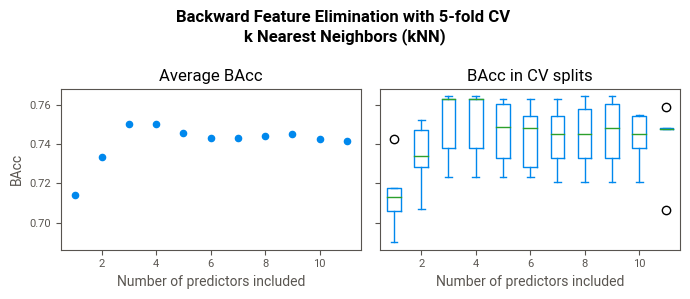

k = 3, avg. BAcc = 0.750 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [45]:
# | label: fig-sfs-knn
# | fig-cap: Sequential Feature Selection using k nearest neighbors (kNN) classifier.
ml.sfs_plot_results(sfs_knn_res, "k Nearest Neighbors (kNN)")

In [46]:
# | label: tbl-sfs-knn
# | tbl-cap: Sequential Feature Selection using kNN classifier.
# |          In column `feature`, the row of interest and the rows above it
# |          indicate the combination of features included in the model, e.g.,
# |          row two (step 10) shows that `family_members` and `annual_income`
# |          are included.
# |          Columns `score_improvement` and `score_percentage_change`
# |          show the difference between the current and the previous row.
# |          The highlighted rows indicate the investigator-selected features of
# |          the best model.
(
    ml.sfs_list_features(sfs_knn_res)
    .style.apply(my.highlight_rows_by_index, values=[11, 10, 9], axis=1)
    .format(precision=3)
)

,feature,metric,score,score_improvement,score_percentage_change
step,,,,,
11,annual_income,BAcc,0.714,nan,nan
10,family_members,BAcc,0.734,0.020,2.771
9,age,BAcc,0.750,0.017,2.271
8,experienced_traveler,BAcc,0.750,0.000,0.000
7,ever_travelled_abroad,BAcc,0.746,-0.005,-0.626
6,graduate_or_not,BAcc,0.743,-0.002,-0.311
5,employment_type_01,BAcc,0.743,-0.000,-0.016
4,frequent_flyer,BAcc,0.744,0.001,0.136
3,age_group_01,BAcc,0.745,0.001,0.151


### SFS for SVC

In [47]:
# | results: hide
sfs_svc = SFS("SVC")

SVC(C=10, gamma=0.1, probability=True, random_state=1)


In [48]:
@my.cache_results(dir_cache + "02_2_sfs_svc_res_bacc.pickle")
def do_sfs_svc():
    """The following code is wrapped into a function for result catching.

    SFS for SVC.
    """
    return sfs_svc.fit(X_train, y_train)


sfs_svc_res = do_sfs_svc()

<details class="with-border"><summary>Output details</summary>

Time: Time: 1m 2.3s   
F1

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.3s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.6s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.0s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.1s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.8s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.1s finished
Features: 1/1
```



Time: 58.4s  
BAcc

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.6s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.1s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.8s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.2s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.7s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.3s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.4s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished
Features: 1/1
```

</details>

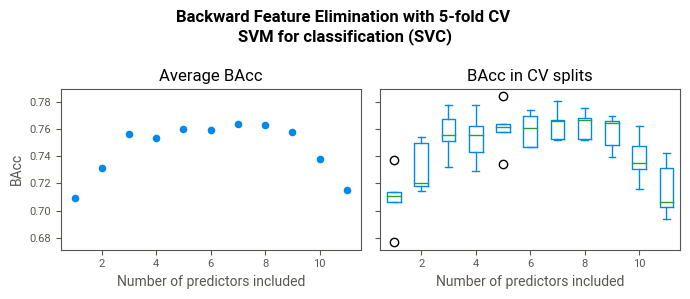

k = 7, avg. BAcc = 0.763 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [49]:
# | label: fig-sfs-svc
# | fig-cap: Sequential Feature Selection using support vector machine for
# |          classification (SVC).
ml.sfs_plot_results(sfs_svc_res, "SVM for classification (SVC)")

In [50]:
# | label: tbl-sfs-svc
# | tbl-cap: Sequential Feature Selection using SVC classifier.
# |          For details, refer to the description of @tbl-sfs-knn.
# |          The highlighted rows indicate the investigator-selected features of
# |          the best model.
(
    ml.sfs_list_features(sfs_svc_res)
    .style.apply(my.highlight_rows_by_index, values=[11, 10, 9], axis=1)
    .format(precision=3)
)

,feature,metric,score,score_improvement,score_percentage_change
step,,,,,
11,annual_income,BAcc,0.709,nan,nan
10,family_members,BAcc,0.731,0.022,3.170
9,age_group_01,BAcc,0.757,0.025,3.441
8,frequent_flyer,BAcc,0.753,-0.003,-0.428
7,graduate_or_not,BAcc,0.760,0.007,0.905
6,ever_travelled_abroad,BAcc,0.759,-0.001,-0.089
5,chronic_diseases,BAcc,0.763,0.004,0.513
4,experienced_traveler,BAcc,0.763,-0.000,-0.058
3,employment_type_01,BAcc,0.758,-0.005,-0.694


### SFS for RF

In [51]:
sfs_rf = SFS("Random Forest")

RandomForestClassifier(random_state=1)


In [52]:
# | results: hide
@my.cache_results(dir_cache + "02_3_sfs_rf_res_bacc.pickle")
def do_sfs_rf():
    """The following code is wrapped into a function for result catching.

    SFS for Random Forest.
    """
    return sfs_rf.fit(X_train, y_train)


sfs_rf_res = do_sfs_rf()

<details class="with-border"><summary>Output details</summary>
Time: 54.8s  
F1

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    5.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.3s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.0s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.3s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    5.2s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.6s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.7s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.2s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.5s finished
Features: 1/1
```

Time: 29.3s  
BAcc

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    2.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.1s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    2.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.0s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    2.5s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.0s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.6s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.4s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s finished
Features: 1/1
```

</details>

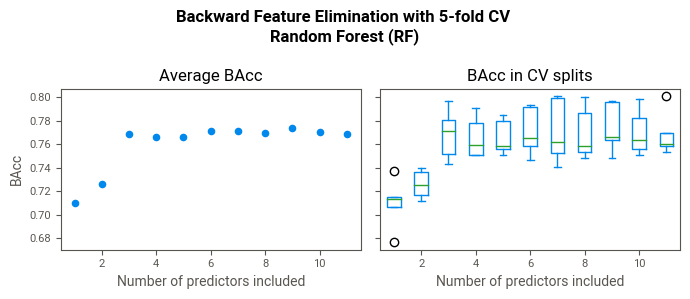

k = 3, avg. BAcc = 0.769 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [53]:
# | label: fig-sfs-rf
# | fig-cap: Sequential Feature Selection using Random Forest classifier.
ml.sfs_plot_results(sfs_rf_res, "Random Forest (RF)")

In [54]:
# | label: tbl-sfs-rf
# | tbl-cap: Sequential Feature Selection using Random Forest classifier.
# |          For details, refer to the description of @tbl-sfs-knn.
# |          The highlighted rows indicate the investigator-selected features of
# |          the best model.
(
    ml.sfs_list_features(sfs_rf_res)
    .style.apply(my.highlight_rows_by_index, values=[11, 10, 9], axis=1)
    .format(precision=3)
)

,feature,metric,score,score_improvement,score_percentage_change
step,,,,,
11,annual_income,BAcc,0.710,nan,nan
10,family_members,BAcc,0.726,0.016,2.299
9,age,BAcc,0.769,0.043,5.857
8,chronic_diseases,BAcc,0.766,-0.003,-0.337
7,income_per_family_member,BAcc,0.766,0.000,0.028
6,ever_travelled_abroad,BAcc,0.771,0.005,0.603
5,age_group_01,BAcc,0.771,0.000,0.043
4,employment_type_01,BAcc,0.770,-0.002,-0.230
3,experienced_traveler,BAcc,0.774,0.005,0.623


## Hyperparameter Tuning

### Tune kNN model

In [55]:
# Tune kNN model
@my.cache_results(dir_cache + "03_1_tune_knn_gridsearch0.pickle")
def tune_knn():
    # Features
    required_features = ["age", "annual_income", "family_members"]
    numeric_features = required_features

    # Group-dependent transformations
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

    group_dependent_preprocessor = ColumnTransformer(
        transformers=[("numeric", numeric_transformer, numeric_features)],
        remainder="passthrough",
    )

    # Pipeline
    pipeline = Pipeline(
        steps=[
            ("preprocessor", group_dependent_preprocessor),
            ("classifier", KNeighborsClassifier()),
        ]
    )

    param_grid_knn = {
        "classifier__n_neighbors": np.arange(1, 31, step=1),
        "classifier__weights": ["uniform", "distance"],
        "classifier__p": np.arange(1, 11, step=1),
    }

    # Perform hyperparameter tuning using cross-validation
    search = GridSearchCV(
        pipeline,
        param_grid_knn,
        cv=5,
        scoring="balanced_accuracy",
        n_jobs=-1,
        verbose=3,
    )
    search.fit(X_train[required_features], y_train)

    return search


tuning_results_knn = tune_knn()

<details class="with-border"><summary>Output details</summary>


```
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
```

Time: 21.1s

</details>

In [56]:
print(
    "\n--- Best kNN model: ---\n",
    f"\nBAcc score (train CV): {tuning_results_knn.best_score_:.3f}",
    "\n\nParameters: ",
)
pprint(tuning_results_knn.best_params_)


print("\nFeatures:")
pprint([*tuning_results_knn.best_estimator_.feature_names_in_])


--- Best kNN model: ---
 
BAcc score (train CV): 0.766 

Parameters: 
{'classifier__n_neighbors': 3,
 'classifier__p': 6,
 'classifier__weights': 'uniform'}

Features:
['age', 'annual_income', 'family_members']


### Tune SVC model

In [57]:
# Tune SVC model
@my.cache_results(dir_cache + "03_2_tune_svc_randomizedsearch.pickle")
def tune_svc():
    # Features
    required_features = ["age_group_01", "annual_income", "family_members"]
    numeric_features = ["annual_income", "family_members"]

    # Group-dependent transformations
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

    group_dependent_preprocessor = ColumnTransformer(
        transformers=[("numeric", numeric_transformer, numeric_features)],
        remainder="passthrough",
    )

    # Pipeline
    imblearn_pipeline = ImbPipeline(
        steps=[
            ("preprocessor", group_dependent_preprocessor),
            ("undersampler", RandomUnderSampler(random_state=1)),
            ("classifier", SVC(random_state=1, probability=True)),
        ]
    )

    param_grid_scv = [
        {
            "classifier__kernel": ["linear"],
            "classifier__C": sps.expon(scale=100),
        },
        {
            "classifier__kernel": ["rbf"],
            "classifier__C": sps.expon(scale=100),
            "classifier__gamma": sps.expon(scale=0.1),
        },
        {
            "classifier__kernel": ["poly"],
            "classifier__C": sps.expon(scale=100),
            "classifier__gamma": sps.expon(scale=0.1),
            "classifier__degree": sps.randint(low=1, high=8),
        },
    ]

    # Perform hyperparameter tuning using cross-validation
    search = RandomizedSearchCV(
        imblearn_pipeline,
        param_grid_scv,
        n_iter=500,
        cv=5,
        scoring="balanced_accuracy",
        n_jobs=-1,
        verbose=4,
        random_state=1,
    )
    search.fit(X_train[required_features], y_train)

    return search


tuning_results_svc = tune_svc()

<details class="with-border"><summary>Output details</summary>

```
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
```

Time: 8m 20.0s

</details>

In [58]:
print(
    "\n--- Best SVC model: ---\n",
    f"\nBAcc (train CV) score: {tuning_results_svc.best_score_:.3f}",
    "\n\nParameters: ",
)
pprint(tuning_results_svc.best_params_)

print("\nFeatures:")
pprint([*tuning_results_svc.best_estimator_.feature_names_in_])


--- Best SVC model: ---
 
BAcc (train CV) score: 0.765 

Parameters: 
{'classifier__C': 402.5323983936054,
 'classifier__gamma': 0.08803276825213846,
 'classifier__kernel': 'rbf'}

Features:
['age_group_01', 'annual_income', 'family_members']


### Tune RF model

In [59]:
# Tune RF model
@my.cache_results(dir_cache + "03_3_tune_rf_randomizedsearch.pickle")
def tune_rf():
    # Features
    required_features = ["age", "annual_income", "family_members"]
    numeric_features = required_features

    # Group-dependent transformations
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

    group_dependent_preprocessor = ColumnTransformer(
        transformers=[("numeric", numeric_transformer, numeric_features)],
        remainder="passthrough",
    )

    # Pipeline
    pipeline = Pipeline(
        steps=[
            ("preprocessor", group_dependent_preprocessor),
            (
                "classifier",
                RandomForestClassifier(random_state=1, oob_score=False),
            ),
        ]
    )

    param_grid_rf = {
        # Number of trees in random forest
        "classifier__n_estimators": [50, *np.arange(100, 3000, step=100)],
        # Number of features to consider at every split
        "classifier__max_features": [1, 2, 3],
        # Maximum number of levels in tree
        "classifier__max_depth": list(np.arange(5, 100, step=5)) + [None],
        # Minimum number of samples required to split a node
        "classifier__min_samples_split": np.arange(2, 11, step=1),
        # Minimum number of samples required at each leaf node
        "classifier__min_samples_leaf": np.arange(1, 11, step=1),
        # Method of selecting samples for training each tree
        "classifier__bootstrap": [True, False],
    }

    # Perform hyperparameter tuning using cross-validation
    search = RandomizedSearchCV(
        pipeline,
        param_grid_rf,
        n_iter=200,
        cv=5,
        scoring="balanced_accuracy",
        n_jobs=-1,
        verbose=3,
    )
    search.fit(X_train[required_features], y_train)

    return search


tuning_results_rf = tune_rf()

<details class="with-border"><summary>Output details</summary>

```
Fitting 5 folds for each of 200 candidates, totalling 1000 fits  
```

Time: 14m 26.1s

</details>



In [60]:
print(
    "\n--- Best RF model: ---\n",
    f"\nBAcc (train CV) score: {tuning_results_rf.best_score_:.3f}",
    "\n\nParameters: ",
)
pprint(tuning_results_rf.best_params_)

print("\nFeatures:")
pprint([*tuning_results_rf.best_estimator_.feature_names_in_])


--- Best RF model: ---
 
BAcc (train CV) score: 0.784 

Parameters: 
{'classifier__bootstrap': False,
 'classifier__max_depth': 25,
 'classifier__max_features': 1,
 'classifier__min_samples_leaf': 9,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 1000}

Features:
['age', 'annual_income', 'family_members']


****


### Summary of Hyperparameter Tuning

@tbl-tune-validation shows that the random forest model performs best. So it will be selected as the final model.


In [61]:
final_candidates = {
    "kNN": tuning_results_knn.best_estimator_,
    "SVC": tuning_results_svc.best_estimator_,
    "RF": tuning_results_rf.best_estimator_,
}

In [62]:
# | code-fold: true
# | label: tbl-tune-test
# | tbl-cap: 'Hyperparameter tuning results for the **training set**
# |           The best values in each column are highlighted.
# |           *Note:* The BAcc scores here and above differ as scores in this
# |            table are not cross-validation scores.'
ml.print_classification_scores(
    final_candidates,
    X_train,
    y_train,
    "--- Train ---",
    color="orange",
    precision=3,
)

--- Train ---
No information rate:  0.642


,Accuracy,BAcc,Kappa,F1,ROC AUC
kNN,0.861,0.829,0.686,0.787,0.829
SVC,0.797,0.766,0.546,0.698,0.766
RF,0.837,0.785,0.616,0.726,0.785


In [63]:
# | code-fold: true
# | label: tbl-tune-validation
# | tbl-cap: 'Hyperparameter tuning results for the **validation set**
# |           The best values in each column are highlighted.'
ml.print_classification_scores(
    final_candidates,
    X_validation,
    y_validation,
    "--- Validation ---",
    precision=3,
)

--- Validation ---
No information rate:  0.644


,Accuracy,BAcc,Kappa,F1,ROC AUC
kNN,0.785,0.742,0.509,0.663,0.742
SVC,0.782,0.746,0.509,0.670,0.746
RF,0.822,0.767,0.579,0.697,0.767


## Final Model Evaluation

### Prepare Data for Final Model Evaluation

- First, merge training and test data to form a dataset that will be used for creating the model.
- Second, separate the predictors and the target variable.

In [64]:
target = "TravelInsurance"

# Train + validation set for training model
data_train_final = pd.concat([data_train, data_validation])
X_train_final = data_train_final.drop(target, axis=1)
y_train_final = data_train_final[target].to_numpy()

# Test set for testing model
X_test = data_test.drop(target, axis=1)
y_test = data_test[target].to_numpy()

### Create Final Pipeline

Now, the final pre-processing and prediction pipeline will be created and fitted:

- First, **define** the final **pipeline**.  
- Second, **fit** the pipeline to the training (training + validation) data.

In [65]:
# Final pipeline
predictors = ["age", "annual_income", "family_members"]

final_pipeline = Pipeline(
    steps=[
        ("assert_data_frame", DataFrameAssertion()),
        ("rename_columns_to_snake_case", ColnamesToSnakeCase()),
        ("select_columns", FeatureSelector(predictors)),
        ("assert_presence_of_columns", ColumnPresenceAssertion(predictors)),
        ("scale", StandardScaler()),
        (
            "classify",
            RandomForestClassifier(
                random_state=1,
                bootstrap=False,
                max_depth=25,
                max_features=1,
                min_samples_leaf=9,
                min_samples_split=10,
                n_estimators=1000,
            ),
        ),
    ]
)

In [66]:
final_pipeline.fit(X_train_final, y_train_final)
y_pred = final_pipeline.predict(X_test)

### Evaluate Model Performance on Test Data

The analysis of the final model performance revealed that:

- The balanced **accuracy** of the final model is **76.7%** (see @tbl-test-performance).
- The model's specificity (96.4%) is larger than sensitivity/recall (57.0%; see @fig-confusion-matrix and @tbl-classification-report) **which means** that it is **easier to identify customers that will not buy** insurance than those who will do.
- The positive predictive value (precision) is 89.7% and the negative predictive value is 80.1% (see @tbl-classification-report). This indicates that predictions are quite accurate.
- The **most important** predictor is **annual income** (see @fig-feature-importance).

In [67]:
# | code-fold: true
# | label: tbl-test-performance
# | tbl-cap: 'Final model performance on the **test set**.'

ml.print_classification_scores(
    {"RF (final)": final_pipeline}, X_test, y_test, "--- Test ---", None, 3
)

--- Test ---
No information rate:  0.642


,Accuracy,BAcc,Kappa,F1,ROC AUC
RF (final),0.823,0.767,0.580,0.697,0.767


In [68]:
# | code-fold: true
# | label: tbl-classification-report
# | tbl-cap: 'Classification report for the final model.'

report = classification_report(y_test, y_pred, digits=3, output_dict=True)
report["accuracy"] = {
    "precision": None,
    "recall": None,
    "f1-score": report["accuracy"],
    "support": report["weighted avg"]["support"],
}
(
    pd.DataFrame(report)
    .T.style.format(precision=3, na_rep="")
    .format(subset="support", precision=0)
)

,precision,recall,f1-score,support
0,0.801,0.964,0.875,192
1,0.897,0.570,0.697,107
accuracy,,,0.823,299
macro avg,0.849,0.767,0.786,299
weighted avg,0.835,0.823,0.811,299


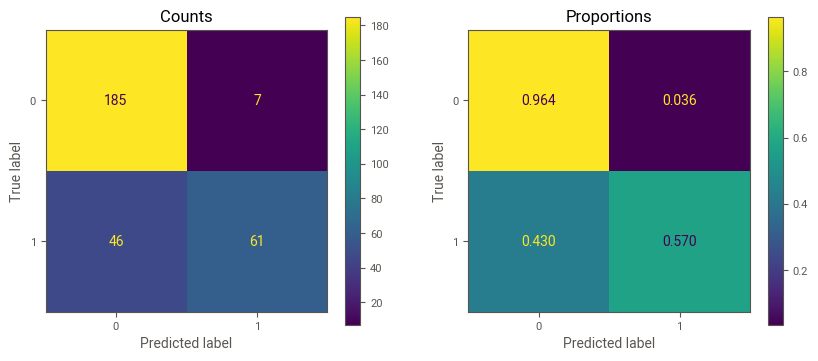

In [69]:
# | code-fold: true
# | label: fig-confusion-matrix
# | fig-cap: 'Confusion matrix for the final model (**test set**): absolute
# |           counts (left) and true-label normalized proportions (right).'

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_title("Counts")
ax[1].set_title("Proportions")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0])
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax[1], normalize="true", values_format="0.3f"
);

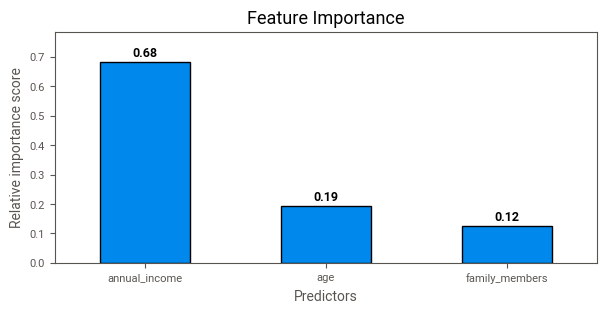

In [70]:
# | code-fold: true
# | label: fig-feature-importance
# | fig-cap: 'Feature importance plot.'

importance = (
    pd.DataFrame(
        {
            "Predictors": final_pipeline[-2].feature_names_in_,
            "Importance": final_pipeline[-1].feature_importances_,
        }
    )
    .sort_values("Importance", ascending=False)
    .assign(label=lambda x: x["Importance"].apply(lambda x: f"{x:.2f}"))
)

my.plot_counts_with_labels(
    importance,
    "Feature Importance",
    x="Predictors",
    y="Importance",
    label="label",
    y_lab="Relative importance score",
    rot=0,
);

## Pipeline for Production

The model trained on the whole dataset (training + validation + test) will be saved to a file. It will be used in the production environment to predict whether a customer will buy insurance or not.

In [71]:
target = "TravelInsurance"
production_pipeline = final_pipeline
production_pipeline.fit(data_train.drop(target, axis=1), data_train[target])

file = dir_cache + "final_pipeline.pkl"
with open(file, "wb") as f:
    pickle.dump(production_pipeline, f)

# Final Remarks

Notes and ideas for improvement:

1) Currently, some Python packages (e.g., SweetViz) are not updated on PyPi and Conda repositories so versions of these packages with custom-made changes are used. So installation instructions are not fully reproducible.
2) In the recursive feature selection part, the under-sampling strategy was not used, which might have led to inferior results for the SVC model. Yet, as all models indicated essentially the same variables as the most important ones, no big difference in results is expected.
3) In some parts, code could have been generalized into functions to avoid code repetition. Yet, as the code was not repeated more than 2-3 times, it was not done.
4) It might be questionable if the "preselect model"-"select features"-"tune model" strategy is the best one.
5) The final RF model used 1000 trees. It could have been explicitly explored if a smaller number of trees would have been sufficient to achieve the same performance. It would be an advantage in terms of computational time and model size.
6) More feature engineering could have been done. For example, it might be beneficial to categorize the annual income variable and test its suitability for classification.
7) For models, which allow that, different weights could have been tried.
8) Instead of some custom-made transformers, Scikit-learn's transformers could have been used (e.g., `OneHotEncoder`).